# Perkenalan

Nama : Haafizh Hamda

Batch : FTDS-032-RMT

Dataset : dataset phase1_ftds_032_hck dengan credit-card-information dari project ftds-hacktiv8-project [berikut](https://console.cloud.google.com/bigquery?p=ftds-hacktiv8-project&d=phase1_ftds_032_hck&t=credit-card-information&page=table)

Objective :

- Mampu memperoleh data menggunakan Google BigQuery.

- Mampu mempersiapkan data untuk digunakan dalam Clustering.

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn.

- Mampu mengimplementasikan Clustering pada data yang telah ditentukan.


Project kali ini bertujuan untuk memprediksi costumer menggunkan clustering mengenal karakter customer berdasarkan cluster dan  memberikan rekomendasi bisnis untuk tim marketing.

Project ini akan dibuat menggunakan reduction dimensi PCA  dengan mempertahankan 95% fitur Algoritma Kmeans dan akan dievaluasi dengan Elbow method dan silhouette_score.

# Package

In [233]:
# Package
import pandas as pd
# Visualisasi
import matplotlib.pyplot as plt
import numpy as np
# Visualisai
import seaborn as sns
# Future Scaler
from sklearn.preprocessing import StandardScaler
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
# Model
from sklearn.cluster import KMeans
# Evaluasi
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from feature_engine.outliers import Winsorizer
# Save the Files
import pickle
import json


# Sql

In [234]:
# from datetime import date
# from google.colab import auth
# from google.cloud import bigquery
# auth.authenticate_user()
# print('Authenticated')

# project_id_akun = "latihanmungkin" # Gunakan GCP Project-ID Anda
# client = bigquery.Client(project=project_id_akun)

# df = client.query('''
# SELECT *
# FrOM `ftds-hacktiv8-project.phase1_ftds_032_hck.credit-card-information`
# WHERE MOD(CUST_ID, 2) = 0
# ''').to_dataframe()
# df.head()

# # simpan dataset1 ke CSV
# df.to_csv('P1G6_haafizhhamda.csv', index=False)

# # tampilkan data 10 pertama
# df.head(10)
# # tampilkan data 10 terakhir
# df.tail(10)

In [235]:
df = pd.read_csv('P1G6_haafizhhamda.csv')
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,7220,4241.864828,1.000000,225.08,225.08,0.00,2842.771908,0.090909,0.090909,0.000000,1.000000,17,2,5000.0,2011.126751,1282.428401,0.000000,11
4466,2916,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7
4467,8024,15258.225900,1.000000,529.30,529.30,0.00,4100.891579,0.500000,0.500000,0.000000,1.000000,23,10,19000.0,2051.146470,3905.740148,0.000000,8
4468,3762,2616.764771,1.000000,72.90,0.00,72.90,4308.339621,0.555556,0.000000,0.444444,1.000000,46,5,5000.0,332.345466,772.297613,0.000000,9
4469,2456,1133.090254,1.000000,85.92,0.00,85.92,551.078807,0.583333,0.000000,0.583333,1.000000,13,7,1200.0,0.000000,NaN,0.000000,12
4470,5628,1780.188356,1.000000,845.67,31.50,814.17,4137.170984,0.750000,0.166667,0.583333,1.000000,71,16,2500.0,3989.545295,566.947431,0.090909,12
4471,8894,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,10,23,3000.0,3236.129237,384.230828,0.000000,6
4472,2716,8220.740014,1.000000,5197.22,4001.41,1195.81,18857.058470,1.000000,0.571429,0.857143,1.000000,25,15,13000.0,12886.441230,1287.324868,0.200000,7
4473,8920,5709.486507,0.833333,0.00,0.00,0.00,2794.326341,0.000000,0.000000,0.000000,1.166667,10,0,6000.0,550.513331,1299.463370,0.000000,6
4474,2652,2876.009336,1.000000,152.61,152.61,0.00,3719.650168,0.333333,0.333333,0.000000,1.166667,24,2,4000.0,248.342971,584.926336,0.000000,6


In [236]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,60,6.526735,0.181818,53.09,53.09,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,1000.0,309.515966,86.885269,0.000000,12
1,180,245.336939,0.363636,909.00,909.00,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,3000.0,340.201751,55.410769,0.000000,12
2,182,16.596410,0.545455,220.48,220.48,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,5000.0,302.180025,60.558319,0.000000,12
3,226,255.400100,0.454545,630.03,630.03,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,3000.0,294.185139,294.438262,0.000000,12
4,282,654.849672,1.000000,630.00,630.00,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,2500.0,729.355023,181.044246,0.000000,12
5,322,11.896546,0.363636,86.00,86.00,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,8000.0,488.720214,85.079975,1.000000,12
6,324,593.785565,0.909091,1150.00,1150.00,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,5300.0,2189.154807,914.975798,0.090909,12
7,452,73.189931,0.636364,199.96,199.96,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,2000.0,362.012001,167.584529,0.000000,12
8,496,1526.506915,1.000000,46.67,46.67,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,1800.0,338.413344,642.547142,0.000000,12
9,520,939.348677,1.000000,50.00,50.00,0.0,0.0,0.083333,0.083333,0.0,0.0,0,1,1000.0,315.440785,628.156487,0.000000,12


# Data Loading

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [238]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [239]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [240]:
df.duplicated().sum()

0

In [241]:
pd.set_option('display.max_colwidth', None)

cols = list(df.select_dtypes(exclude='object').columns)

listItem = []
for col in cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,CUST_ID,4475,"[60, 180, 182, 226, 282, 322, 324, 452, 496, 520, 538, 548, 590, 598, 636, 662, 728, 762, 858, 882, 902, 952, 1172, 1176, 1218, 1232, 1244, 1314, 1322, 1376, 1408, 1448, 1452, 1630, 1694, 1774, 1802, 1818, 1824, 1922, 1928, 1962, 2048, 2122, 2178, 2304, 2358, 2498, 2510, 2544, 2550, 2636, 2768, 2808, 2868, 2944, 2960, 3018, 3042, 3054, 3158, 3170, 3180, 3190, 3250, 3278, 3290, 3322, 3394, 3434, 3524, 3562, 3578, 3620, 3636, 3676, 3704, 3718, 3746, 3802, 3832, 3848, 3866, 3894, 3920, 3954, 4004, 4062, 4120, 4172, 4262, 4274, 4368, 4372, 4386, 4400, 4420, 4448, 4472, 4514, ...]"
1,BALANCE,4439,"[6.526735, 245.336939, 16.59641, 255.4001, 654.849672, 11.896546, 593.785565, 73.189931, 1526.506915, 939.348677, 2.564117, 1.941328, 71.983739, 2.872146, 624.049989, 3.956222, 56.720267, 689.697644, 22.794308, 162.94835, 287.589522, 0.391963, 5.340221, 71.558308, 917.732846, 1.816814, 35.460649, 634.759973, 14.58126, 12.683677, 26.143505, 32.124999, 55.539236, 6.109243, 200.580245, 0.065402, 1248.193121, 170.617046, 0.407093, 937.086541, 509.872908, 0.147275, 2.11508, 11.673388, 3.691925, 226.78538, 54.842927, 151.787402, 1.025109, 2.081357, 4104.710798, 72.188087, 952.51575, 11.890862, 10.486808, 5.663355, 2683.746154, 3.93442, 44.613002, 117.205812, 50.366106, 176.478557, 79.554406, 477.45278, 3.248979, 17.245539, 2229.857287, 144.006679, 12.597034, 95.865855, 2.484819, 75.012641, 3822.559709, 2586.533933, 0.683939, 26.787185, 3.925627, 1955.179305, 475.826042, 283.691223, 1242.886266, 845.815387, 36.023577, 4028.03648, 42.045574, 5.465999, 926.341558, 62.489102, 1278.279881, 1096.228243, 11.725408, 2138.185971, 745.342323, 852.530387, 41.643083, 1.059103, 817.714335, 166.442301, 188.701762, 31.111548, ...]"
2,BALANCE_FREQUENCY,42,"[0.181818, 0.363636, 0.545455, 0.454545, 1.0, 0.909091, 0.636364, 0.090909, 0.818182, 0.272727, 0.727273, 0.0, 0.6, 0.2, 0.3, 0.1, 0.888889, 0.444444, 0.333333, 0.111111, 0.125, 0.875, 0.375, 0.571429, 0.857143, 0.666667, 0.5, 0.166667, 0.7, 0.9, 0.222222, 0.25, 0.8, 0.833333, 0.75, 0.625, 0.4, 0.777778, 0.714286, 0.555556, 0.285714, 0.142857]"
3,PURCHASES,3218,"[53.09, 909.0, 220.48, 630.03, 630.0, 86.0, 1150.0, 199.96, 46.67, 50.0, 47.95, 15.3, 1000.0, 37.0, 500.0, 480.01, 260.0, 22.68, 12.0, 400.0, 33.35, 43.33, 35.97, 650.0, 18.41, 21.05, 378.58, 19.91, 87.3, 31.68, 124.03, 380.89, 201.27, 73.64, 354.0, 69.0, 40.13, 350.0, 49.0, 79.0, 31.89, 66.78, 76.0, 27.99, 210.64, 105.0, 1234.32, 59.66, 26.49, 203.82, 117.9, 129.95, 165.0, 241.27, 35.0, 130.0, 29.99, 281.7, 215.0, 507.57, 600.0, 472.71, 71.48, 91.26, 19.5, 45.65, 99.0, 1123.58, 41.2, 480.02, 17.7, 114.0, 17.8, 503.45, 950.0, 17.6, 37.5, 273.8, 90.0, 196.81, 290.0, 15.0, 313.38, 178.0, 49.25, 212.0, 25.5, 16.0, 797.58, 900.45, 110.0, 32.25, 619.59, 27.22, 177.23, 404.24, 16.5, 646.24, 13.69, 10.89, ...]"
4,ONEOFF_PURCHASES,2073,"[53.09, 909.0, 220.48, 630.03, 630.0, 86.0, 1150.0, 199.96, 46.67, 50.0, 47.95, 0.0, 1000.0, 37.0, 500.0, 480.01, 260.0, 12.0, 400.0, 35.97, 650.0, 378.58, 124.03, 380.89, 201.27, 73.64, 354.0, 350.0, 49.0, 79.0, 31.89, 76.0, 27.99, 210.64, 105.0, 1234.32, 26.49, 203.82, 117.9, 129.95, 165.0, 241.27, 35.0, 130.0, 29.99, 281.7, 215.0, 507.57, 600.0, 472.71, 71.48, 45.65, 99.0, 1123.58, 41.2, 480.02, 17.7, 114.0, 17.8, 503.45, 950.0, 17.6, 273.8, 90.0, 173.0, 290.0, 15.0, 313.38, 178.0, 49.25, 212.0, 25.5, 16.0, 797.58, 900.45, 110.0, 619.59, 27.22, 70.26, 404.24, 16.5, 646.24, 156.5, 399.99, 45.0, 42.49, 60.0, 341.7, 55.12, 85.0, 148.0, 77.0, 69.57, 1091.0, 107.0, 197.21, 166.8, 301.07, 69.0, 66.14, ...]"
5,INSTALLMENTS_PURCHASES,2357,"[0.0, 15.3, 22.68, 33.35, 43.33, 18.41, 21.05, 19.91, 87.3, 31.68, 69.0, 40.13, 66.78, 59.66, 91.26, 19.5, 37.5, 23.81, 32.25, 106.97, 13.69, 10.89, 47.05, 102.79, 27.05, 78.33, 238.25, 90.66, 81.78, 67.5, 83.0, 45.87, 133.35, 79.24, 13.66, 137.55, 55.55, 37.0, 200.0, 9.9, 83.35, 102.63, 102.98, 237.6, 70.98, 100.0, 80.0, 51.16, 30.98,

> temuan 
- 18 kolom numerik
- 4475 jumlah baris
- 629.4 KB jumlah memori
- 158 jumlah missing value pada kolom MINIMUM_PAYMENTS
- tanpa duplicate
- tanpa keanehan kolom dan unique value seperti MCAR, MAR


### Data Backup

In [242]:
df_backup = df.copy()

# EDA

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [244]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


> temuan pada cust_id
- memiliki cust yang nilai minimal 2
> temuan pada balance 
- memiliki nilai minimal 0 dengan nilai tengah 874 dan nilai maximal 19043 dan nilai rata2 1565 . ini tidak realisitis

In [245]:
df = df.sort_values(by="CUST_ID", ascending=True)
df = df.reset_index(drop=True)
df['CUST_ID'] = df['CUST_ID'].astype('object')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2,4613.570499,1.0,0.00,0.00,0.00,1728.341939,0.000000,0.000000,0.000000,0.090909,1,0,6000.0,922.218961,1460.635220,0.0,11
1,4,2583.247881,1.0,1337.35,45.65,1291.70,2484.594650,1.000000,0.083333,1.000000,0.500000,18,21,3000.0,819.792196,6404.855484,0.0,12
2,6,1597.911395,1.0,0.00,0.00,0.00,162.919727,0.000000,0.000000,0.000000,0.250000,3,0,1800.0,548.420841,416.956325,0.0,12
3,8,3506.489102,1.0,0.00,0.00,0.00,4467.382055,0.000000,0.000000,0.000000,1.000000,11,0,5000.0,286.708354,628.484562,0.0,6
4,10,2306.310095,1.0,359.96,0.00,359.96,2843.482435,0.916667,0.000000,0.916667,0.333333,6,11,4000.0,1482.816136,2056.434829,0.0,12


### 1. Apakah terdapat pola antara pengaruh TENURE dengan variabel PURCHASES, BALANCE, dan PAYMENTS ? Buatlah visualisasi yang menunjukkan hubungan ini berikan rekomendasi bisnis untuk tim marketing mengenai hal ini.

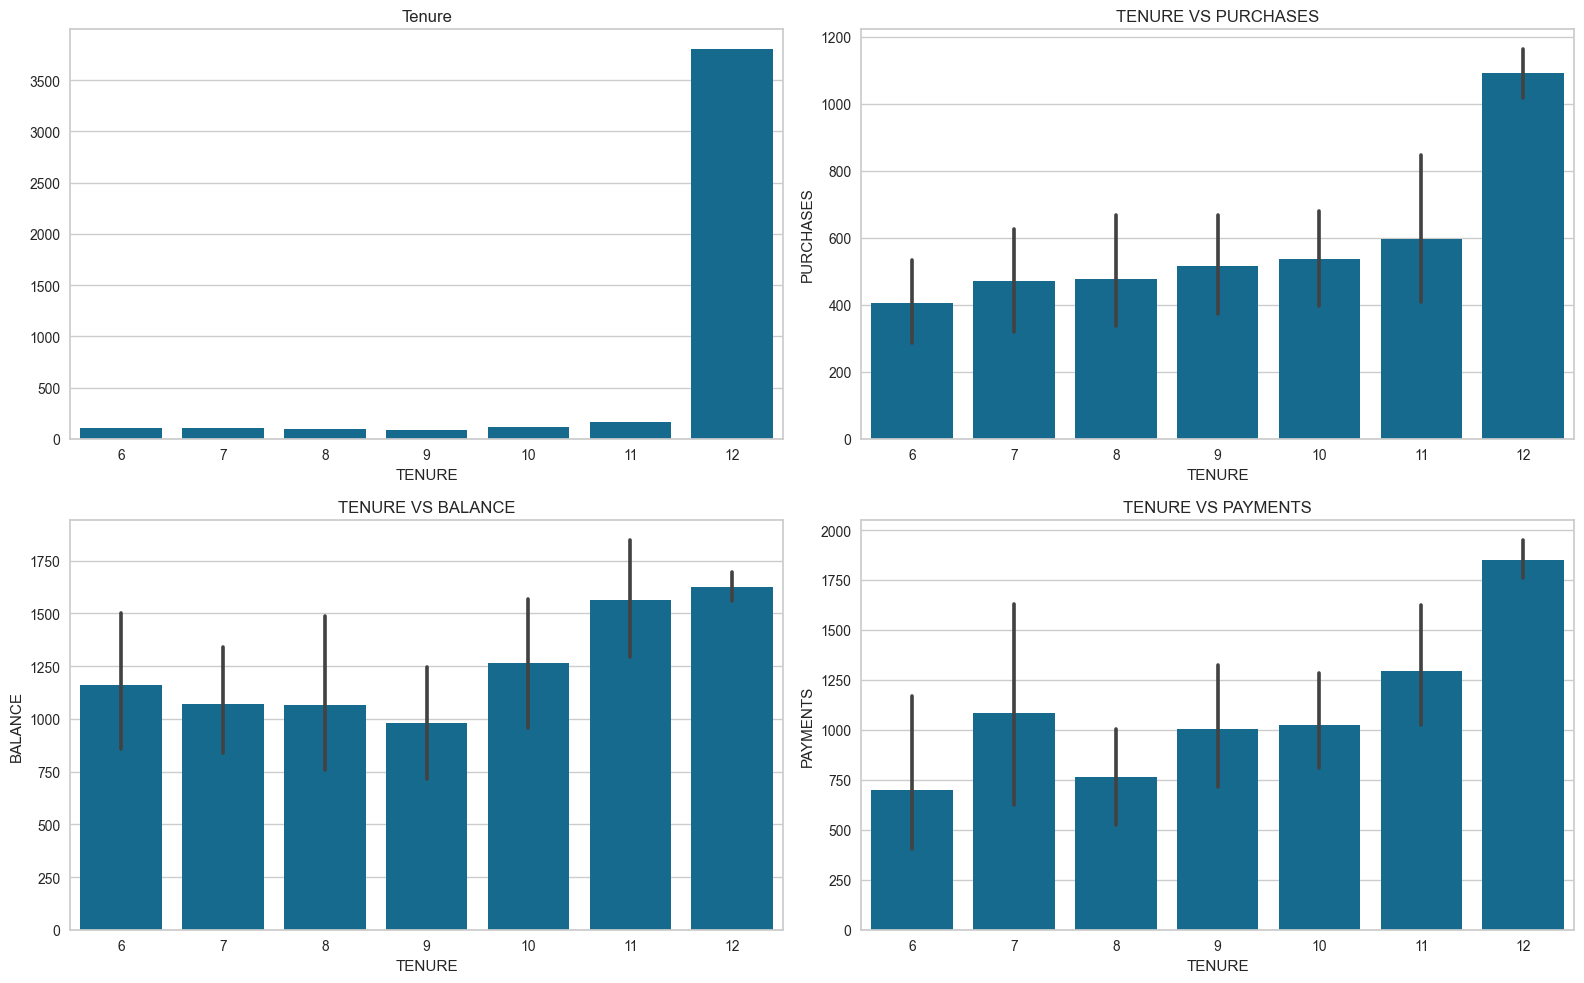

In [246]:
count_tenure = df['TENURE'].value_counts()

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=count_tenure.index, y=count_tenure.values)
plt.title("Tenure")


plt.subplot(2, 2, 2)
sns.barplot(x='TENURE', y='PURCHASES', data=df)
plt.title('TENURE VS PURCHASES')


plt.subplot(2, 2, 3)
sns.barplot(x='TENURE', y='BALANCE', data=df)
plt.title('TENURE VS BALANCE')


plt.subplot(2, 2, 4)
sns.barplot(x='TENURE', y='PAYMENTS', data=df)
plt.title('TENURE VS PAYMENTS')

# Tampilkan semua subplot
plt.tight_layout()
plt.show()


> Pola antara tenure dengan purchases, balance dan payment
- Tenure
Meyoritas cutomer melakukan tenure 12 bulan
- Tenure VS Purchases
Jumlah pembelian pelanggan dengan tenure 6 dan 7 bulan melakukan pembelian lebih sedikit dari pada tenure 12 bulan
- Tenure VS Balance
Pelanggan dengan tenure 9 bulan memiliki jumlah saldo yang sedikit untuk melakukan pembelian, dibanding enure 6 dan 7 bulan. atau pelanggan dengan tenure 9 lebih boros dari tapada tenure 6 dan 7 bulan
- Tenure VS Payments
- pelanggan dengan tenure 7 bulan mebayar pelunasan lebih besar dibanding pelanggan tenure 9 bulan

> Rekomendasi bisnis tim marketing
- mempertahankan atau mengarahkan pelanggan tenure 12 bulan kenapa, Customer dengan tenure 12 bulan lebih aktif, pembelian lebih banyak, saldo lebih besar, dan pembayaran juga tinggi 

### 2. Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian ? Lakukanlah analisis untuk mengetahui bagaimana CREDIT_LIMIT mempengaruhi frekuensi pembelian (PURCHASES_FREQUENCY). Buatlah visualisasi yang menunjukkan hubungan ini dan berikan rekomendasi bisnis untuk tim marketing mengenai hal ini.

In [247]:
# Function untuk mengelompokkan Credit Limit
def credit_category(x):
    if x <=2000:
        return "Low"
    elif x <= 4000:
        return "Medium"
    else:
        return "High"

# Membuat kolom baru dengan apply
df['credit_category'] = df['CREDIT_LIMIT'].apply(credit_category)

df[['CREDIT_LIMIT', 'credit_category']].head()


,CREDIT_LIMIT,credit_category
0,6000.0,High
1,3000.0,Medium
2,1800.0,Low
3,5000.0,High
4,4000.0,Medium


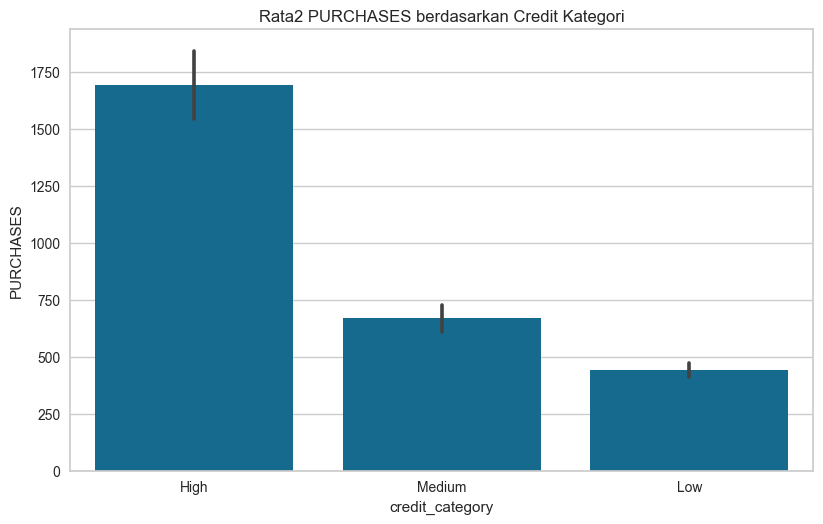

In [248]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 2)
sns.barplot(x='credit_category', y='PURCHASES', data=df)
plt.title('Rata2 PURCHASES berdasarkan Credit Kategori')

# Tampilkan semua subplot
plt.tight_layout()
plt.show()


> Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian ? 
-  ya

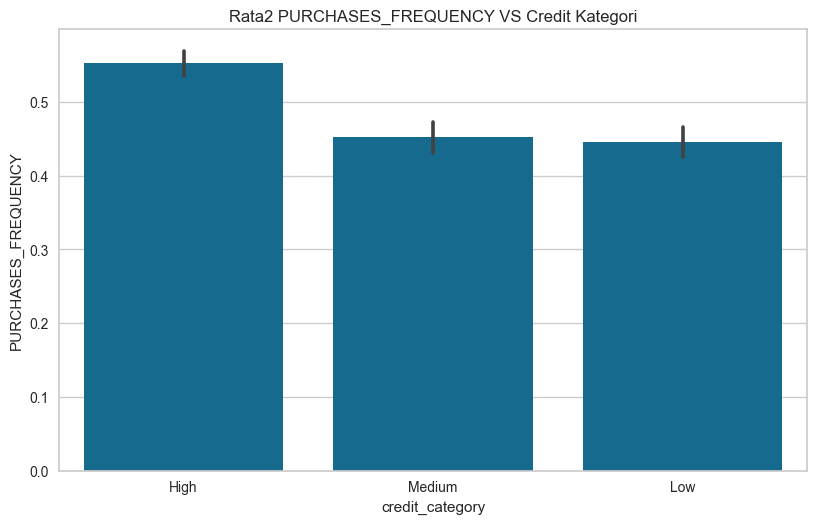

In [249]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 2)
sns.barplot(x='credit_category', y='PURCHASES_FREQUENCY', data=df)
plt.title('Rata2 PURCHASES_FREQUENCY VS Credit Kategori')

# Tampilkan semua subplot
plt.tight_layout()
plt.show()


> Lakukanlah analisis untuk mengetahui bagaimana CREDIT_LIMIT mempengaruhi frekuensi pembelian (PURCHASES_FREQUENCY)
- Customer dengan Credit Limit tinggi memiliki Purchases Frequency tertinggi (0.55).
- Customer dengan Credit Limit sedang sedikit lebih tinggi dibanding Low, tapi perbedaannya tipis.

Secara keseluruhan, semakin tinggi Credit Limit maka semakin sering customer bertransaksi (meskipun efeknya tidak terlalu besar)

# Feuture Engginer

###  Define Numerik

In [250]:
df_backup = df_backup.drop('CUST_ID', axis=1)

In [251]:
df_backup['BALANCE_FREQUENCY'] = df_backup['BALANCE_FREQUENCY'].astype('object')
df_backup['PURCHASES_FREQUENCY'] = df_backup['PURCHASES_FREQUENCY'].astype('object')
df_backup['ONEOFF_PURCHASES_FREQUENCY'] = df_backup['ONEOFF_PURCHASES_FREQUENCY'].astype('object')
df_backup['PURCHASES_INSTALLMENTS_FREQUENCY'] = df_backup['PURCHASES_INSTALLMENTS_FREQUENCY'].astype('object')
df_backup['CASH_ADVANCE_FREQUENCY'] = df_backup['CASH_ADVANCE_FREQUENCY'].astype('object')
df_backup['PRC_FULL_PAYMENT'] = df_backup['PRC_FULL_PAYMENT'].astype('object')
df_backup['TENURE'] = df_backup['TENURE'].astype('object')

In [252]:
# Ambil kolom numerik
num_cols = list(df_backup.select_dtypes(exclude='object').columns)

# Ambil kolom kategorikal
cat_cols = list(df_backup.select_dtypes(include='object').columns)

print(f"Numerik kolom  : {num_cols}")
print(f"Kategorikal kolom : {cat_cols}")


Numerik kolom  : ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
Kategorikal kolom : ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']


### Check Cardinality

In [253]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in cat_cols:
  listItem.append([col, df_backup[col].nunique(), df_backup[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,BALANCE_FREQUENCY,42,"[0.181818, 0.363636, 0.545455, 0.454545, 1.0, 0.909091, 0.636364, 0.090909, 0.818182, 0.272727, 0.727273, 0.0, 0.6, 0.2, 0.3, 0.1, 0.888889, 0.444444, 0.333333, 0.111111, 0.125, 0.875, 0.375, 0.571429, 0.857143, 0.666667, 0.5, 0.166667, 0.7, 0.9, 0.222222, 0.25, 0.8, 0.833333, 0.75, 0.625, 0.4, 0.777778, 0.714286, 0.555556, 0.285714, 0.142857]"
1,PURCHASES_FREQUENCY,47,"[0.083333, 0.090909, 0.1, 0.111111, 0.125, 0.142857, 0.166667, 0.181818, 0.2, 0.222222, 0.25, 0.272727, 0.285714, 0.3, 0.333333, 0.363636, 0.375, 0.4, 0.416667, 0.428571, 0.444444, 0.454545, 0.5, 0.545455, 0.555556, 0.571429, 0.583333, 0.6, 0.625, 0.636364, 0.666667, 0.7, 0.714286, 0.727273, 0.75, 0.777778, 0.8, 0.818182, 0.833333, 0.857143, 0.875, 0.888889, 0.9, 0.909091, 0.916667, 1.0, 0.0]"
2,ONEOFF_PURCHASES_FREQUENCY,44,"[0.083333, 0.0, 0.090909, 0.1, 0.111111, 0.125, 0.142857, 0.166667, 0.2, 0.222222, 0.25, 0.272727, 0.285714, 0.3, 0.333333, 0.363636, 0.375, 0.4, 0.416667, 0.428571, 0.454545, 0.181818, 0.5, 0.545455, 0.555556, 0.571429, 0.583333, 0.6, 0.625, 0.666667, 0.7, 0.714286, 0.636364, 0.727273, 0.75, 0.444444, 0.818182, 0.833333, 0.875, 0.916667, 1.0, 0.888889, 0.909091, 0.857143]"
3,PURCHASES_INSTALLMENTS_FREQUENCY,47,"[0.0, 0.083333, 0.090909, 0.1, 0.111111, 0.125, 0.142857, 0.166667, 0.181818, 0.2, 0.25, 0.272727, 0.333333, 0.3, 0.416667, 0.444444, 0.222222, 0.454545, 0.363636, 0.5, 0.4, 0.375, 0.545455, 0.555556, 0.571429, 0.285714, 0.714286, 0.428571, 0.583333, 0.6, 0.636364, 0.666667, 0.727273, 0.75, 0.625, 0.7, 0.818182, 0.833333, 0.857143, 0.875, 0.777778, 0.888889, 0.8, 0.909091, 0.916667, 1.0, 0.9]"
4,CASH_ADVANCE_FREQUENCY,46,"[0.0, 0.083333, 0.090909, 0.1, 0.111111, 0.125, 0.142857, 0.166667, 0.181818, 0.2, 0.222222, 0.25, 0.272727, 0.285714, 0.3, 0.333333, 0.363636, 0.375, 0.4, 0.416667, 0.428571, 0.444444, 0.454545, 0.5, 0.545455, 0.555556, 0.571429, 0.583333, 0.6, 0.625, 0.636364, 0.666667, 0.714286, 0.727273, 0.75, 0.777778, 0.8, 0.833333, 0.857143, 0.875, 0.888889, 0.9, 0.909091, 0.916667, 1.0, 1.166667]"
5,PRC_FULL_PAYMENT,47,"[0.0, 1.0, 0.090909, 0.75, 0.111111, 0.142857, 0.5, 0.083333, 0.1, 0.166667, 0.333333, 0.25, 0.222222, 0.181818, 0.125, 0.272727, 0.666667, 0.4, 0.428571, 0.2, 0.571429, 0.3, 0.8, 0.363636, 0.285714, 0.6, 0.444444, 0.714286, 0.454545, 0.777778, 0.545455, 0.636364, 0.857143, 0.625, 0.875, 0.888889, 0.416667, 0.555556, 0.583333, 0.833333, 0.375, 0.727273, 0.9, 0.909091, 0.818182, 0.916667, 0.7]"
6,TENURE,7,"[12, 11, 10, 9, 8, 7, 6]"


> temuan
- ada 7 kolom kategorikal 
- dari ke 7 kolom tersebut merupakan hasil dari scaling yang berupa numerik

### Handing Outlier

In [254]:
#check distribution form skewness
listItem= []

for col in num_cols:
  listItem.append([col, round(df_backup[col].skew(),1), np.where(
    (round(df_backup[col].skew(),1) <= 0.5) & (round(df_backup[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,BALANCE,2.5,skewed
1,PURCHASES,9.0,skewed
2,ONEOFF_PURCHASES,10.1,skewed
3,INSTALLMENTS_PURCHASES,8.1,skewed
4,CASH_ADVANCE,4.7,skewed
5,CASH_ADVANCE_TRX,4.8,skewed
6,PURCHASES_TRX,4.5,skewed
7,CREDIT_LIMIT,1.5,skewed
8,PAYMENTS,6.0,skewed
9,MINIMUM_PAYMENTS,12.4,skewed


> Skew Extrem
- PURCHASES
- ONEOFF_PURCHASES
- INSTALLMENTS_PURCHASES
- MINIMUM_PAYMENTS

dari kolom diatas datap dikatakan memiliki nilai mayoritas kecil dengan beberapa nilai besar (extrem) sehingga perlu handling outlier

In [255]:
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = df_backup[col].quantile(0.75) - df_backup[col].quantile(0.25)
    lower_boundary = df_backup[col].quantile(0.25) - (IQR * 3)
    upper_boundary = df_backup[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = df_backup[col].mean() - 3* df_backup[col].std()
    upper_boundary = df_backup[col].mean() + 3* df_backup[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df_backup[df_backup[col] > upper_boundary]) / len(df_backup) * 100) + (len(df_backup[df_backup[col] < lower_boundary]) / len(df_backup) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,BALANCE,7836.47,-5645.41,2.28
1,PURCHASES,4370.36,-3207.66,4.07
2,ONEOFF_PURCHASES,2321.28,-1740.96,6.23
3,INSTALLMENTS_PURCHASES,1937.02,-1452.76,4.11
4,CASH_ADVANCE,4394.28,-3295.71,5.47
5,CASH_ADVANCE_TRX,16.00,-12.00,4.00
6,PURCHASES_TRX,65.00,-47.00,3.73
7,CREDIT_LIMIT,19500.00,-12000.00,0.31
8,PAYMENTS,6413.22,-4127.05,4.38
9,MINIMUM_PAYMENTS,2812.14,-1811.93,4.49


In [256]:
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['BALANCE',  'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',  'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
                            missing_values='ignore')

df_backup_capped = winsoriser.fit_transform(df_backup)

In [257]:
#check distribution form skewness
listItem= []

for col in num_cols:
  listItem.append([col, round(df_backup_capped[col].skew(),1), np.where(
    (round(df_backup_capped[col].skew(),1) <= 0.5) & (round(df_backup_capped[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,BALANCE,1.7,skewed
1,PURCHASES,1.8,skewed
2,ONEOFF_PURCHASES,1.7,skewed
3,INSTALLMENTS_PURCHASES,1.8,skewed
4,CASH_ADVANCE,1.7,skewed
5,CASH_ADVANCE_TRX,1.8,skewed
6,PURCHASES_TRX,1.8,skewed
7,CREDIT_LIMIT,1.5,skewed
8,PAYMENTS,1.7,skewed
9,MINIMUM_PAYMENTS,1.8,skewed


In [258]:
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = df_backup_capped[col].quantile(0.75) - df_backup_capped[col].quantile(0.25)
    lower_boundary = df_backup_capped[col].quantile(0.25) - (IQR * 3)
    upper_boundary = df_backup_capped[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = df_backup_capped[col].mean() - 3* df_backup_capped[col].std()
    upper_boundary = df_backup_capped[col].mean() + 3* df_backup_capped[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(df_backup_capped[df_backup_capped[col] > upper_boundary]) / len(df_backup_capped) * 100) + (len(df_backup_capped[df_backup_capped[col] < lower_boundary]) / len(df_backup_capped) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,BALANCE,7836.47,-5645.41,0.0
1,PURCHASES,4370.36,-3207.66,0.0
2,ONEOFF_PURCHASES,2321.28,-1740.96,0.0
3,INSTALLMENTS_PURCHASES,1937.02,-1452.76,0.0
4,CASH_ADVANCE,4394.28,-3295.71,0.0
5,CASH_ADVANCE_TRX,16.00,-12.00,0.0
6,PURCHASES_TRX,65.00,-47.00,0.0
7,CREDIT_LIMIT,19500.00,-12000.00,0.0
8,PAYMENTS,6413.22,-4127.05,0.0
9,MINIMUM_PAYMENTS,2812.14,-1811.93,0.0


In [259]:
df_backup_capped.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4475.0,1515.77,1876.77,0.00,132.54,874.91,2058.52,7836.47
PURCHASES,4475.0,838.48,1138.34,0.00,40.06,362.48,1122.64,4370.36
ONEOFF_PURCHASES,4475.0,426.82,686.89,0.00,0.00,29.99,580.32,2321.28
INSTALLMENTS_PURCHASES,4475.0,348.44,525.42,0.00,0.00,89.45,484.26,1937.02
CASH_ADVANCE,4475.0,788.09,1303.57,0.00,0.00,0.00,1098.57,4394.28
CASH_ADVANCE_TRX,4475.0,2.76,4.41,0.00,0.00,0.00,4.00,16.00
PURCHASES_TRX,4475.0,12.93,16.57,0.00,1.00,7.00,17.00,65.00
CREDIT_LIMIT,4474.0,4486.76,3633.28,150.00,1500.00,3000.00,6000.00,19500.00
PAYMENTS,4475.0,1475.63,1628.41,0.00,390.21,831.05,1895.96,6413.22
MINIMUM_PAYMENTS,4317.0,638.99,727.08,0.04,169.81,309.85,830.40,2812.14


In [260]:
df_backup.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4475.0,1565.74,2091.21,0.00,132.54,874.91,2058.52,19043.14
PURCHASES,4475.0,1003.16,2210.81,0.00,40.06,362.48,1122.64,49039.57
ONEOFF_PURCHASES,4475.0,588.50,1666.50,0.00,0.00,29.99,580.32,40761.25
INSTALLMENTS_PURCHASES,4475.0,415.03,927.36,0.00,0.00,89.45,484.26,22500.00
CASH_ADVANCE,4475.0,973.45,2133.46,0.00,0.00,0.00,1098.57,29282.11
CASH_ADVANCE_TRX,4475.0,3.20,6.50,0.00,0.00,0.00,4.00,110.00
PURCHASES_TRX,4475.0,14.49,24.16,0.00,1.00,7.00,17.00,358.00
CREDIT_LIMIT,4474.0,4494.02,3668.54,150.00,1500.00,3000.00,6000.00,30000.00
PAYMENTS,4475.0,1726.21,2961.26,0.00,390.21,831.05,1895.96,46930.60
MINIMUM_PAYMENTS,4317.0,854.43,2306.41,0.04,169.81,309.85,830.40,61031.62


Perubahan
> Minimum_Payments
- Jumlah baris Minimum_Payments telah seimbang antar kolom
- Nilai rata2 dan std telah seimbang
- Nilai Maximal dari kolom Minimum_Payments. Dengan nilai 61031 ini sudah tergolong jumlah besar, kini telah berubah

In [261]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BALANCE - Before trim


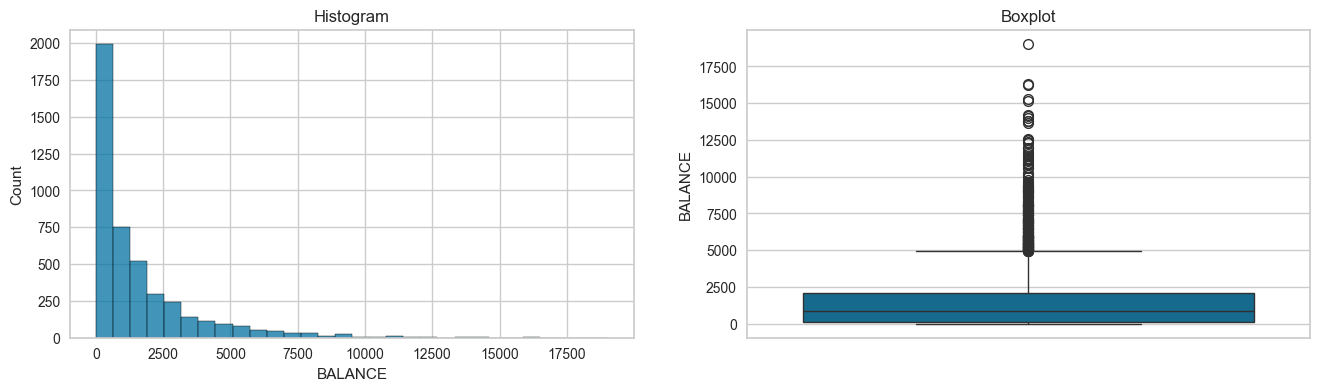


BALANCE - After trim


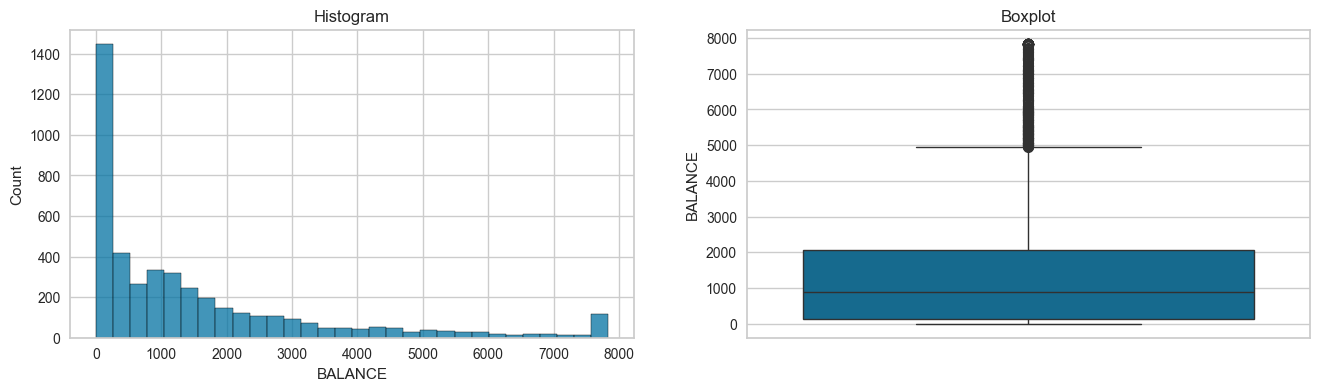

PURCHASES - Before trim


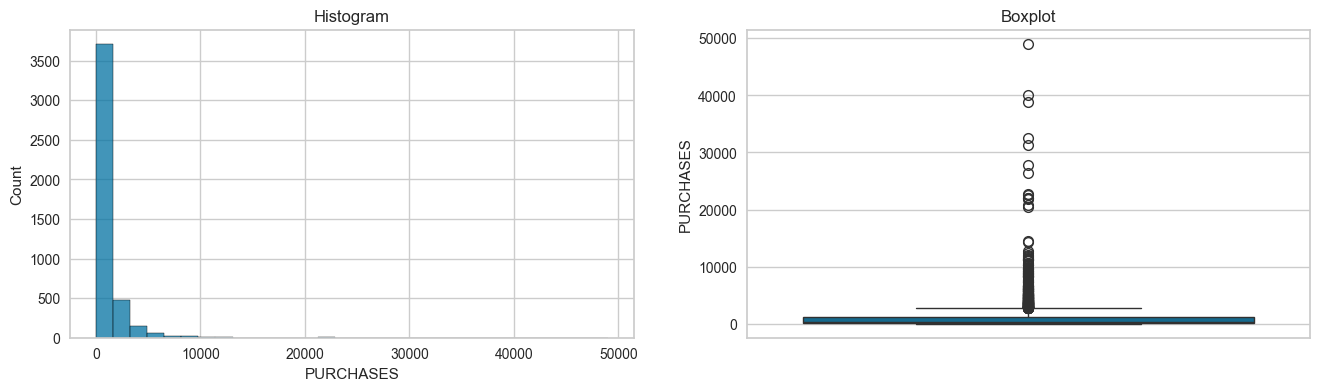


PURCHASES - After trim


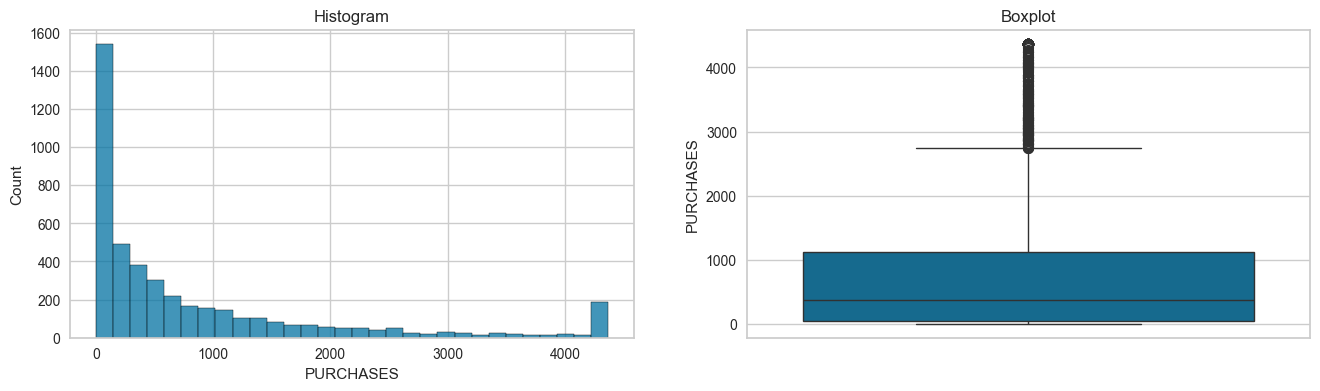

ONEOFF_PURCHASES - Before trim


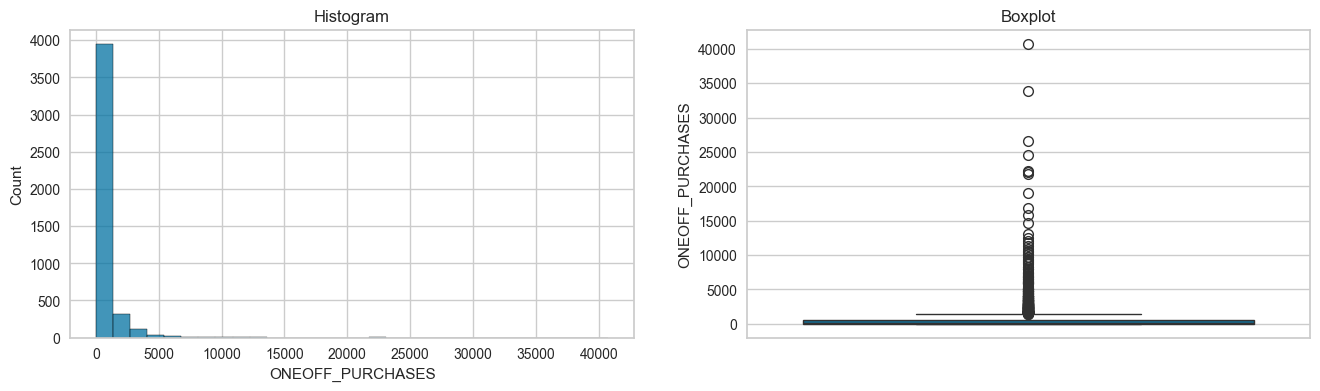


ONEOFF_PURCHASES - After trim


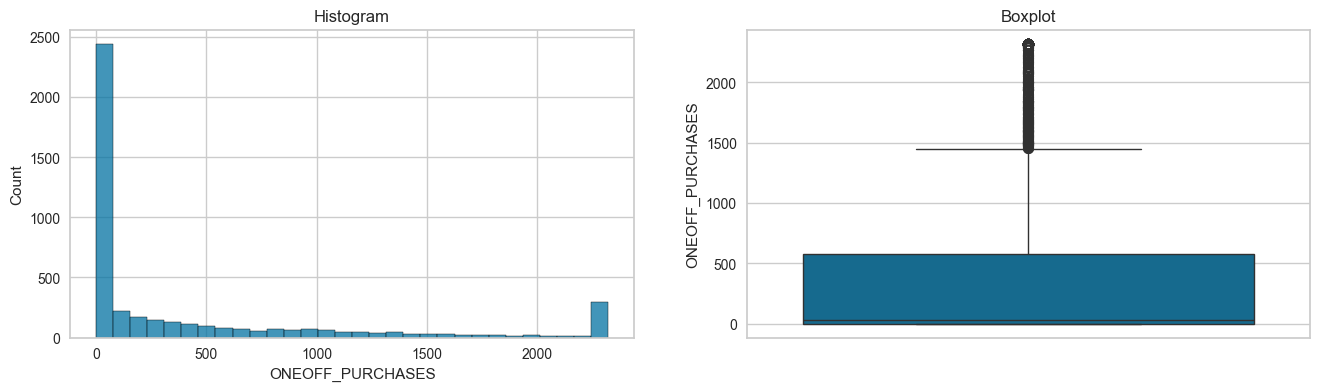

INSTALLMENTS_PURCHASES - Before trim


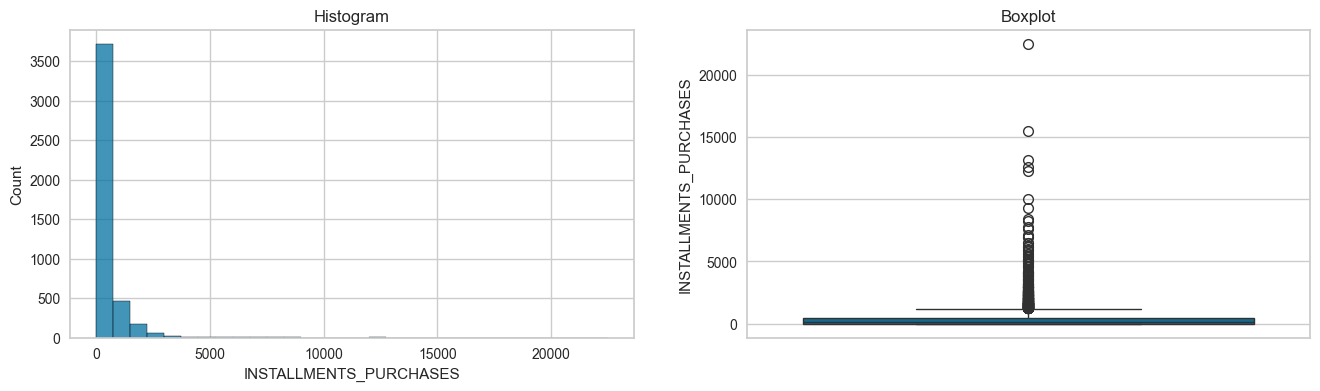


INSTALLMENTS_PURCHASES - After trim


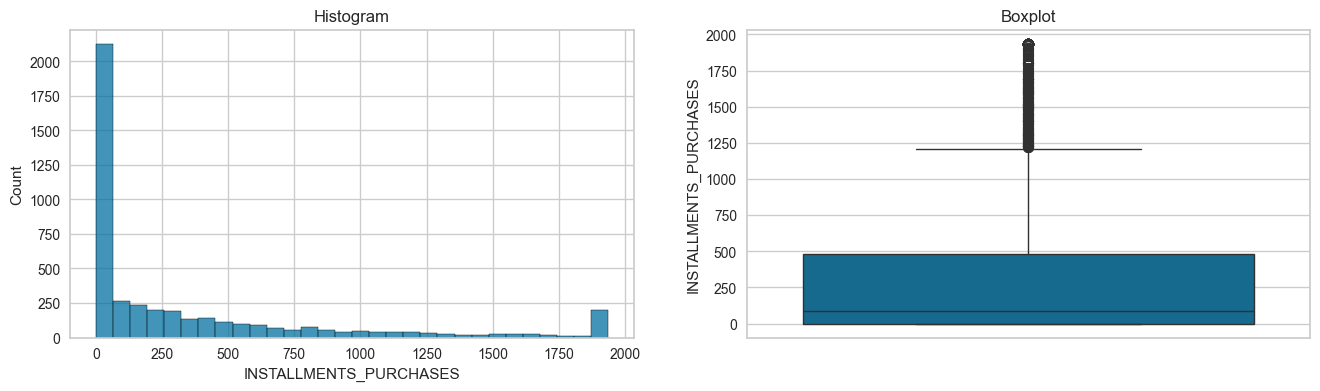

CASH_ADVANCE - Before trim


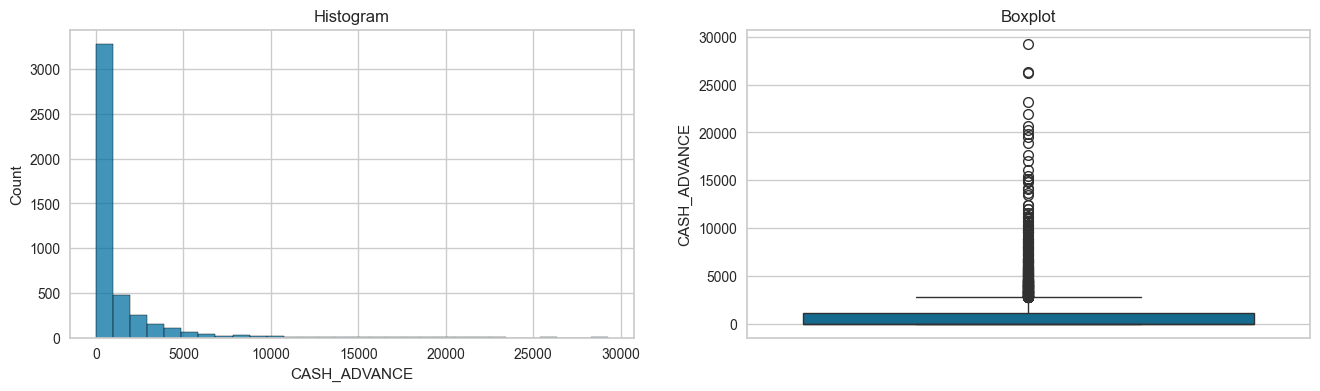


CASH_ADVANCE - After trim


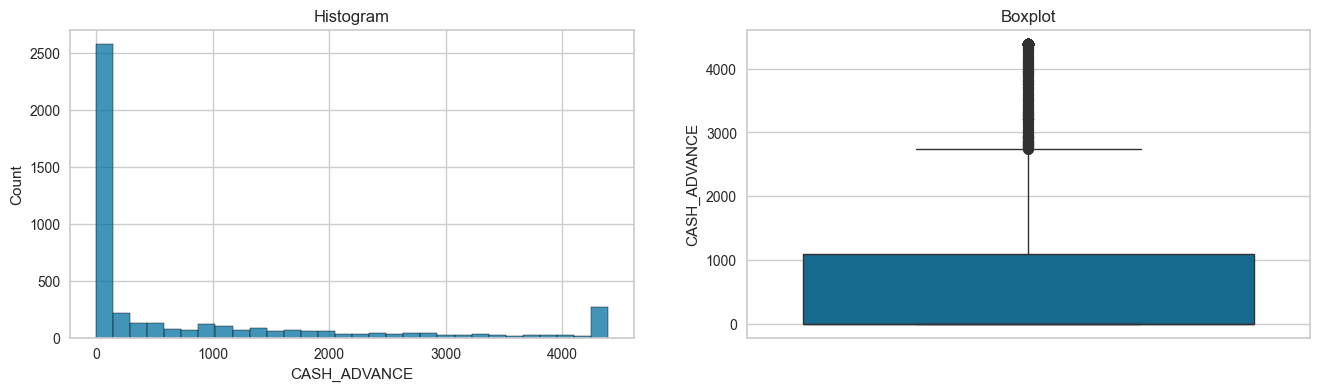

CASH_ADVANCE_TRX - Before trim


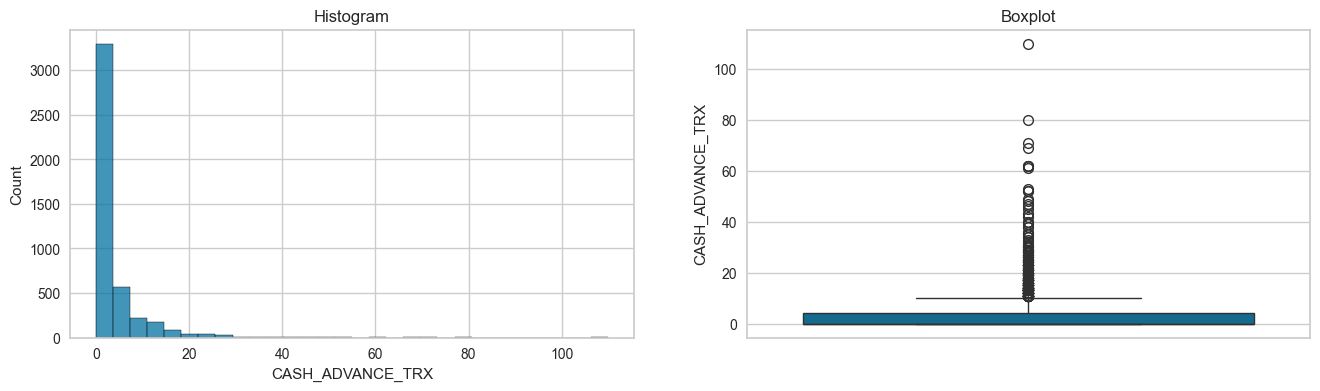


CASH_ADVANCE_TRX - After trim


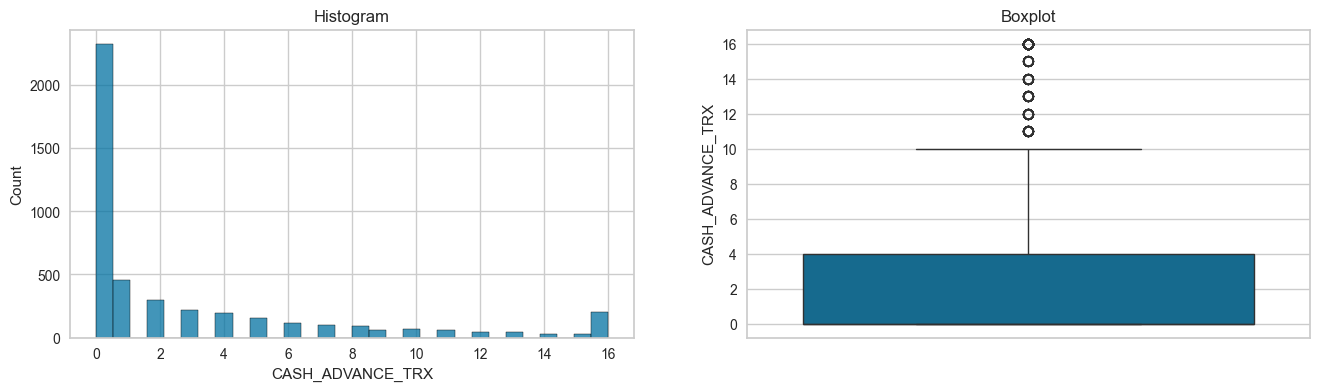

PURCHASES_TRX - Before trim


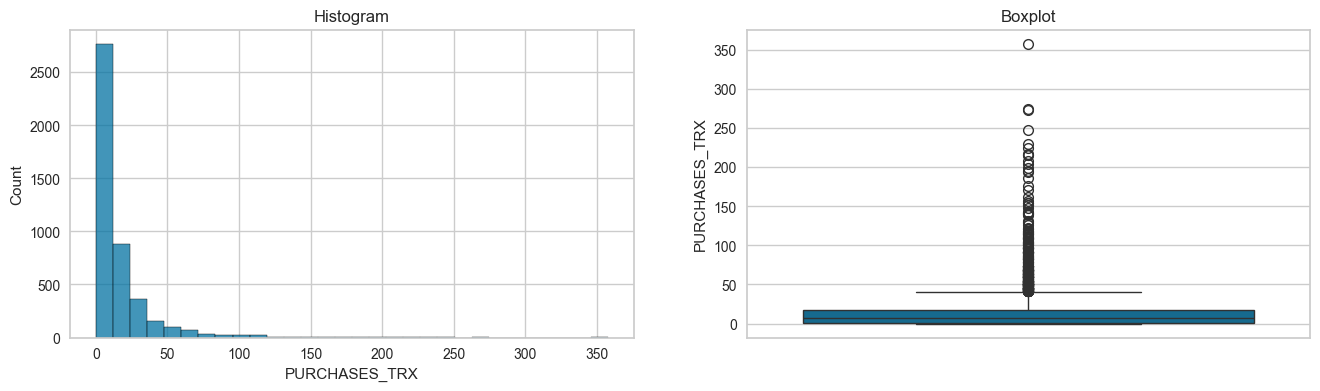


PURCHASES_TRX - After trim


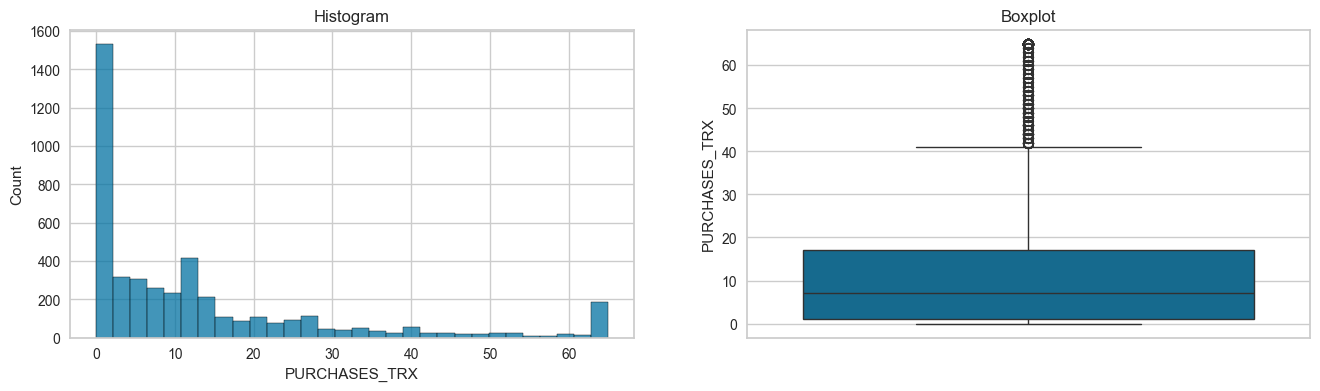

CREDIT_LIMIT - Before trim


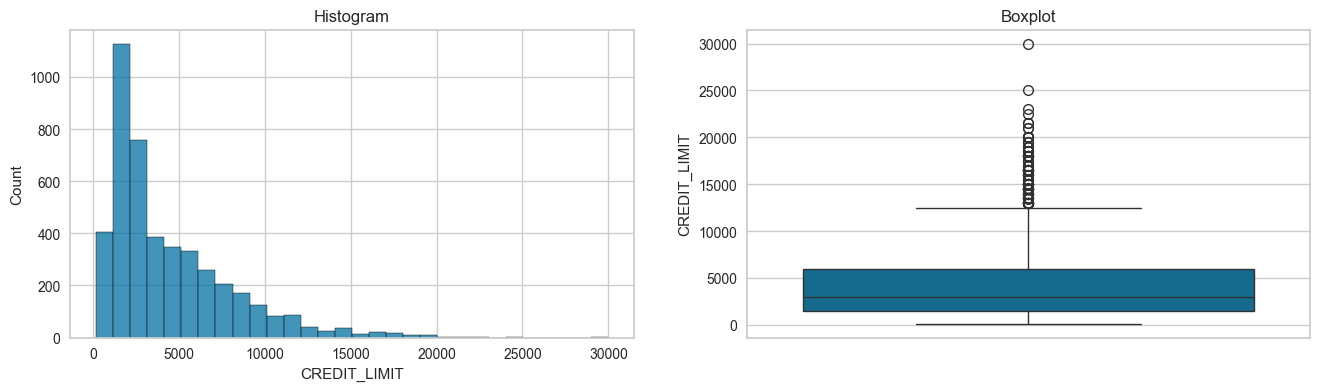


CREDIT_LIMIT - After trim


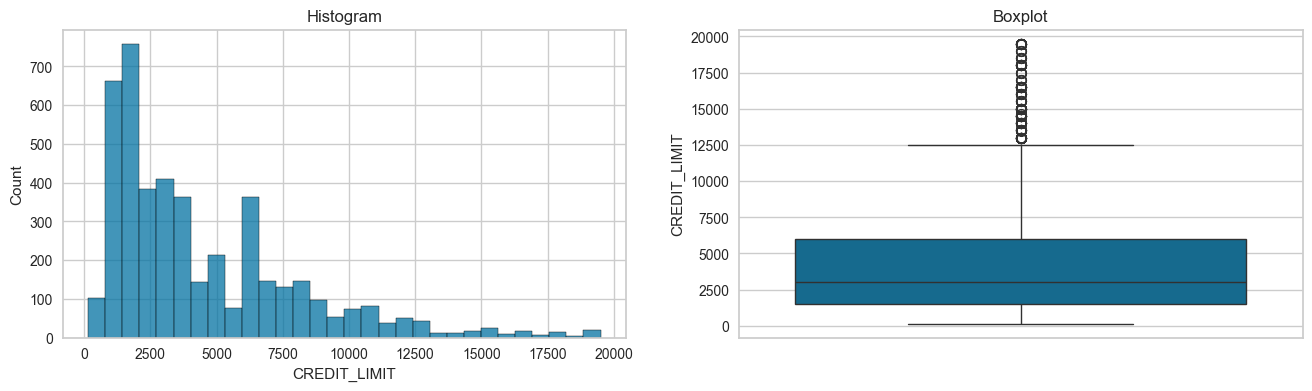

PAYMENTS - Before trim


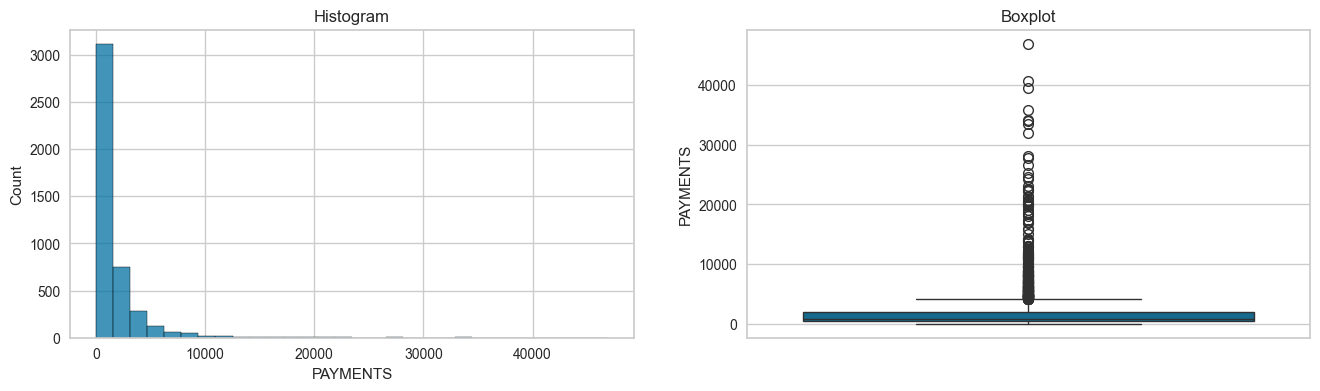


PAYMENTS - After trim


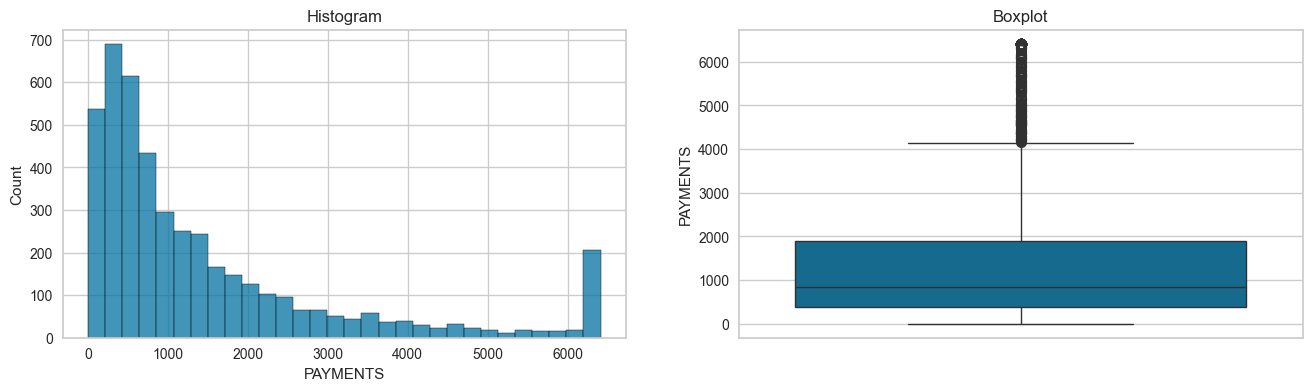

MINIMUM_PAYMENTS - Before trim


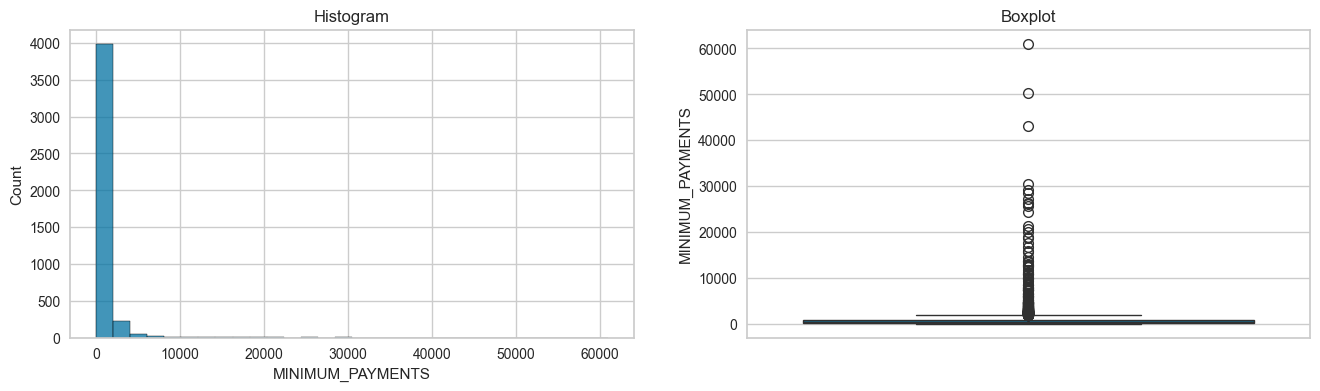


MINIMUM_PAYMENTS - After trim


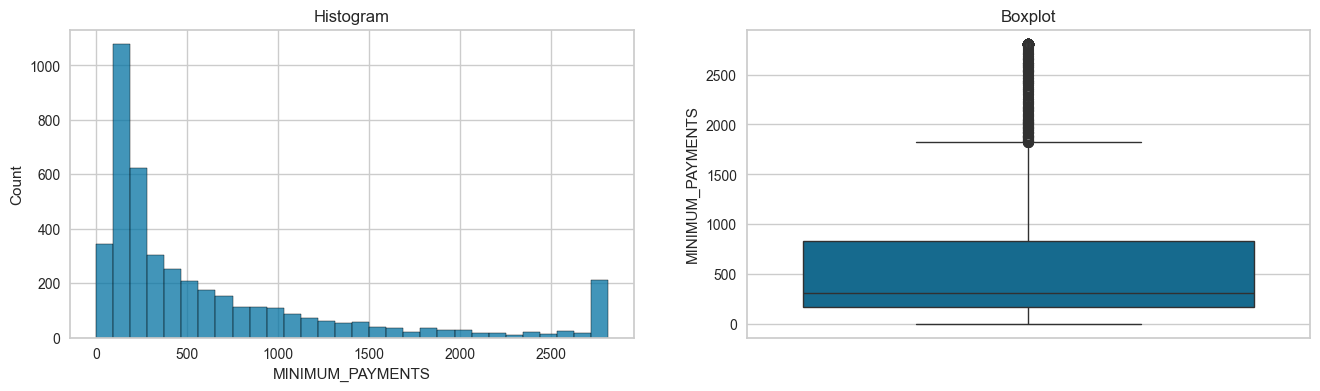

In [262]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before trim')
  diagnostic_plots(df_backup, col)

  print(f'\n{col} - After trim')
  diagnostic_plots(df_backup_capped, col)

before
> MINIMUM_PAYMENTS 
- nilai extream sangat banyak hingga 60000
- dristibusinya fokus pada sekitar nilai 0

after
> MINIMUM_PAYMENTS
- nilai extrem telah berubah sangat
- dristibusinya tidak fokus pada nilai 0

### Missing Value

In [263]:
df_backup_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   object 
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   object 
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   object 
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   object 
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   object 
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

In [264]:
df_backup_capped.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [265]:
print(df_backup_capped['CREDIT_LIMIT'].skew())
print(df_backup_capped['MINIMUM_PAYMENTS'].skew())

1.4506009012891294
1.7801564668796948


In [266]:
# Hitung median kolom CREDIT_LIMIT
median_credit_limit = df_backup_capped['CREDIT_LIMIT'].median()
median_minimum_payment = df_backup_capped['MINIMUM_PAYMENTS'].median()

# Isi nilai NaN di kolom CREDIT_LIMIT dengan median
df_backup_capped['CREDIT_LIMIT'] = df_backup_capped['CREDIT_LIMIT'].fillna(median_credit_limit)
df_backup_capped['MINIMUM_PAYMENTS'] = df_backup_capped['MINIMUM_PAYMENTS'].fillna(median_minimum_payment)


In [267]:
df_backup_capped.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [268]:
df_backup_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   object 
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   object 
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   object 
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   object 
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   object 
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

> Handling Mising value
- mising value pada kolom credit limit dengan jumlah 1
- handling menggunakan median dari kolom credit limit dikarnakan kolom memiliki nilai skew

### Scaling

In [269]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_backup_capped)
df_clean_scaled

array([[-0.80426327, -2.95354289, -0.69001686, ..., -0.75420808,
        -0.53139385,  0.35882369],
       [-0.67700345, -2.18174798,  0.06195805, ..., -0.79812845,
        -0.53139385,  0.35882369],
       [-0.79889723, -1.40994881, -0.54295341, ..., -0.79094542,
        -0.53139385,  0.35882369],
       ...,
       [ 3.36824223,  0.51953848,  3.10300168, ...,  0.92091773,
         0.1446558 , -3.35128722],
       [ 2.23479302, -0.18794231, -0.73666002, ...,  0.93785612,
        -0.53139385, -4.0933094 ],
       [ 0.72485836,  0.51953848, -0.6025818 , ..., -0.05922814,
        -0.53139385, -4.0933094 ]])

### Dimensionality Reduction

In [270]:
pca = PCA()
pca.fit(df_clean_scaled)


PCA()

Text(0, 0.5, 'Eigenvalues')

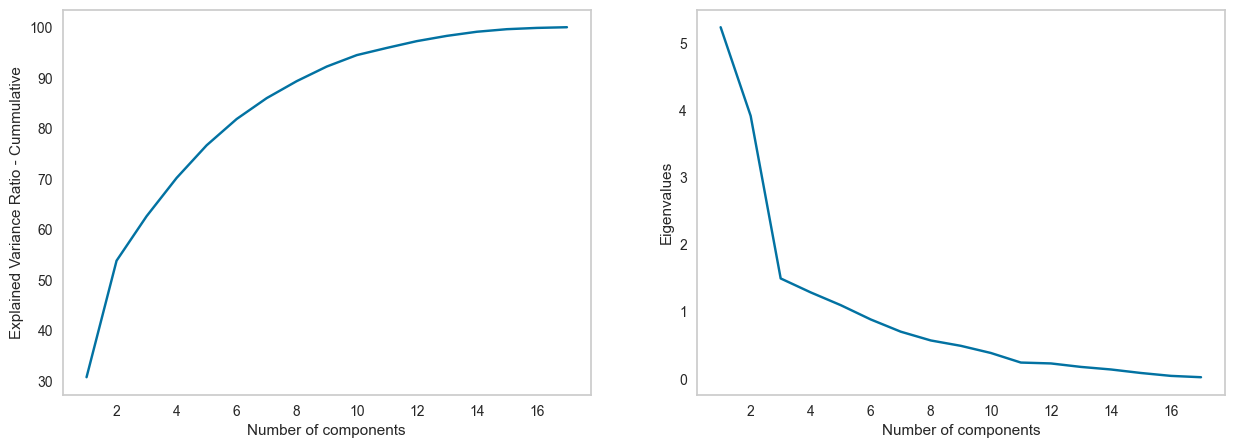

In [271]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

> Cumulative Explained Variance Ratio vs Number of Components
- Dengan 7 komponen utama, sudah menjelaskan lebih dari 80% variasi data.
- Setelah 14 komponen, tambahan komponen hanya menambah sedikit variansi.
> Eigenvalues vs Number of Components
- Komponen 1 memiliki eigenvalue tertinggi, yang artinya dia menjelaskan variansi terbesar.
- Komponen 17 memiliki eigenvalue terendah, yang artinya dia menjelaskan variansi terkecil.
- Mulai dari komponen ke-7 ke bawah, nilai eigen < 1, kontribusinya relatif kecil.
> pada dataset ini sebenarnya tidak perlu melakukan reduce dimensional dikarnakan jumlah dari komponen hanya 17 fitur. jika dilakukan reduce maka sebagian fitur akan hilang,dan belum tergolong data sangat besar tapi kali ini saya akan mempertahankan 95% dari fitur 

In [272]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print(f"Jumlah dari 95% fitur:",num_features)

Jumlah dari 95% fitur: 11


In [273]:
Pca = PCA(n_components=0.95)
Pca.fit(df_clean_scaled)

df_scaled_pca = Pca.transform(df_clean_scaled)

### Find the Optimal Number of Clusters

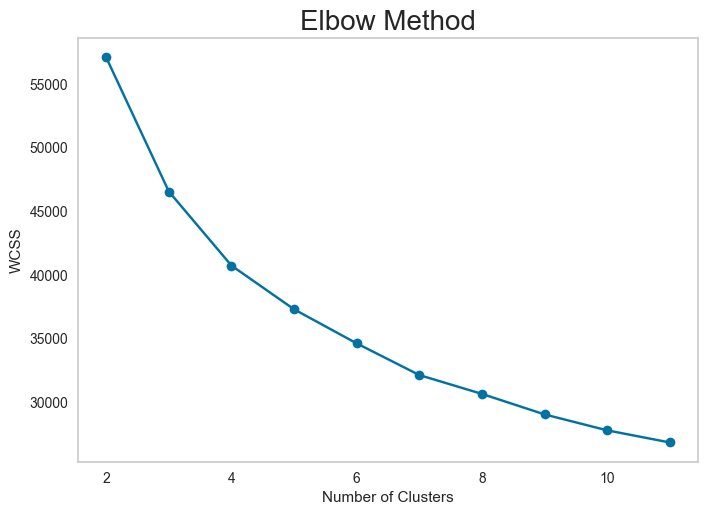

In [274]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 11
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca) 
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

> Elbow Method
- Titik elbow yang paling jelas tampak component 3.
>untuk lebih rincinya akan dilakukan Silhouette score beserta Plot

In [275]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.27251156396486104
For n_clusters = 3 The average silhouette_score is : 0.2515535033047149
For n_clusters = 4 The average silhouette_score is : 0.20506057566632813
For n_clusters = 5 The average silhouette_score is : 0.2082232700861999
For n_clusters = 6 The average silhouette_score is : 0.21529137857248976
For n_clusters = 7 The average silhouette_score is : 0.22557478161535552
For n_clusters = 8 The average silhouette_score is : 0.22650060041491443
For n_clusters = 9 The average silhouette_score is : 0.21152054627760367
For n_clusters = 10 The average silhouette_score is : 0.21211002755984812


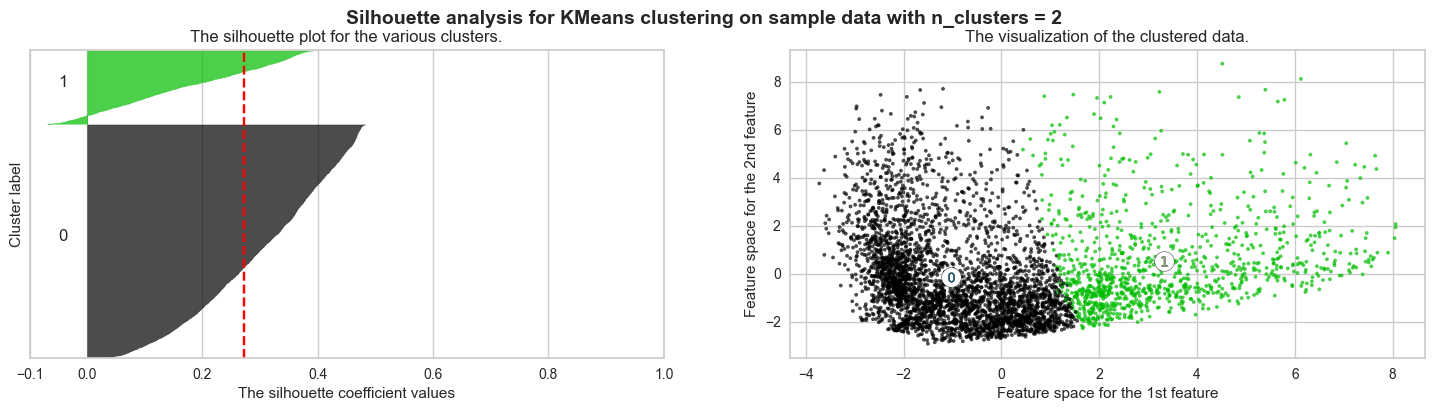

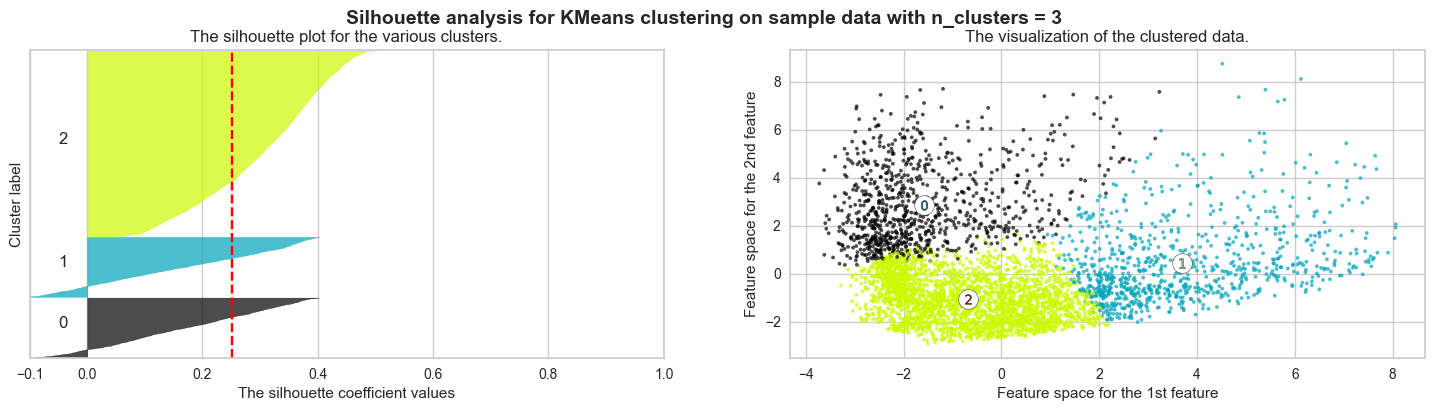

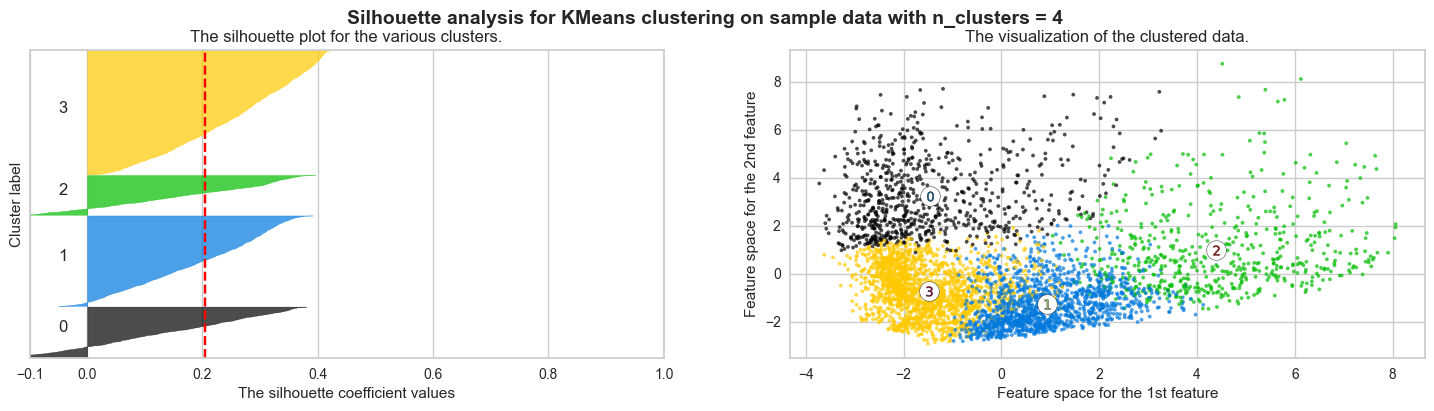

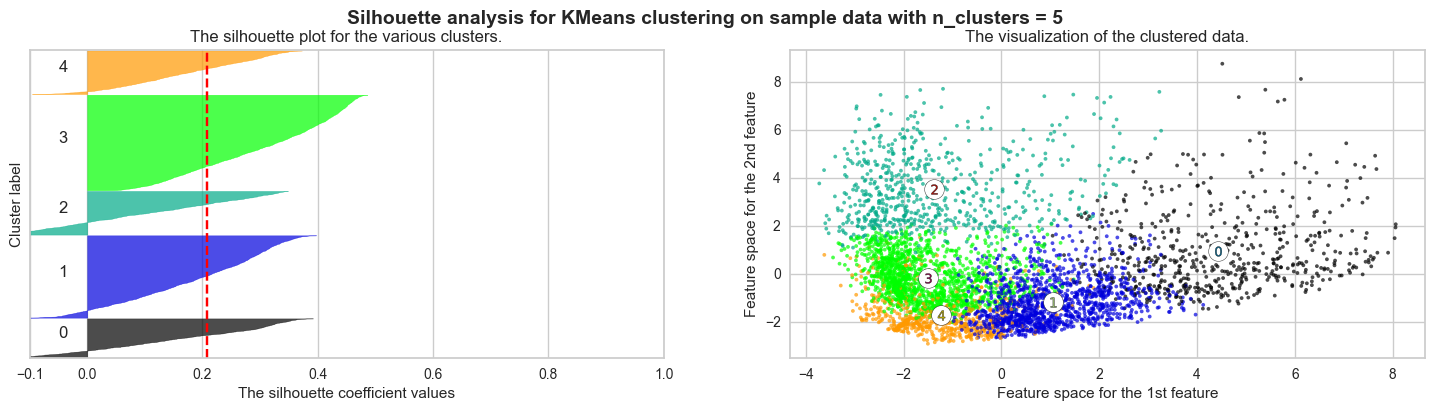

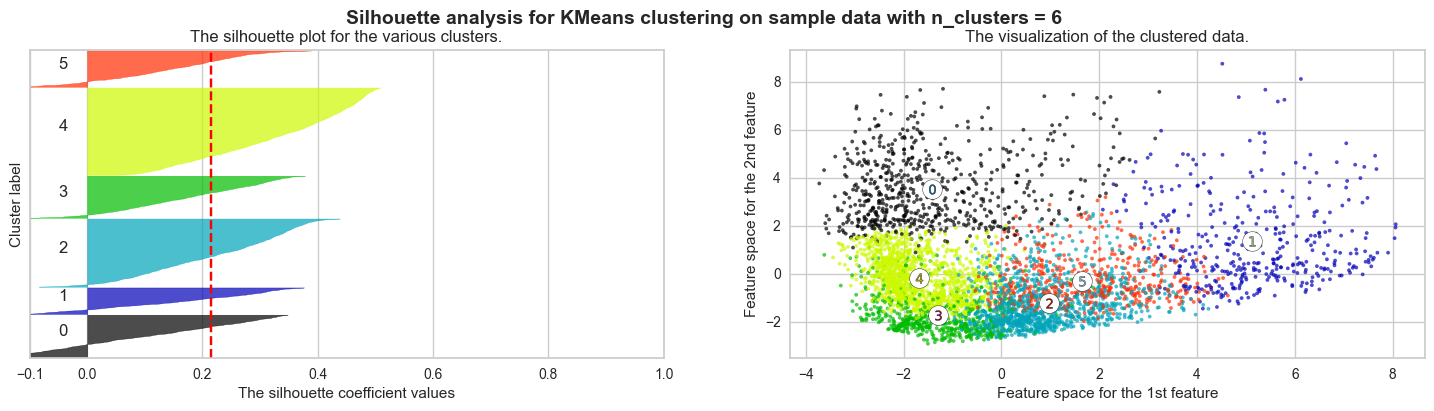

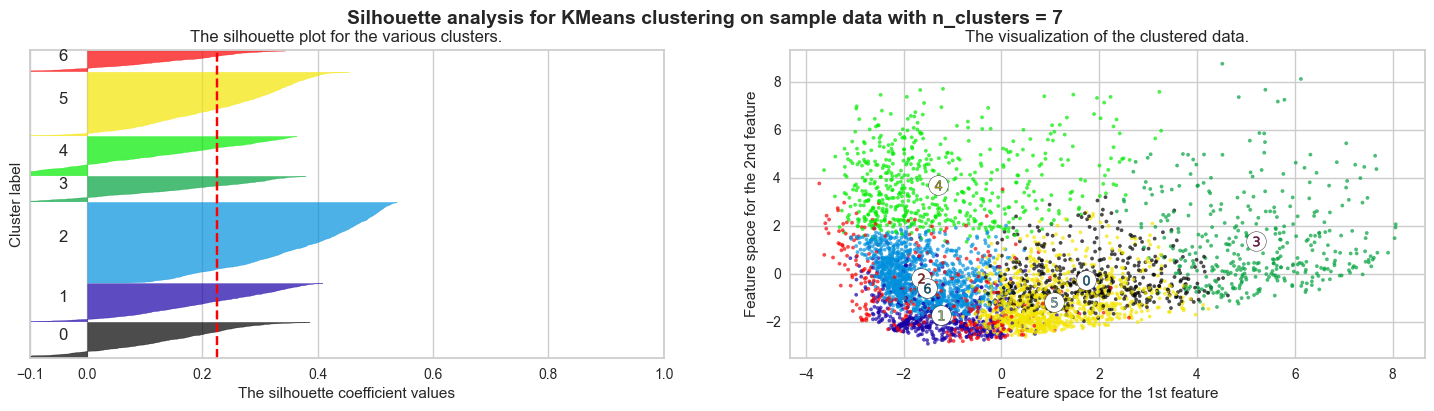

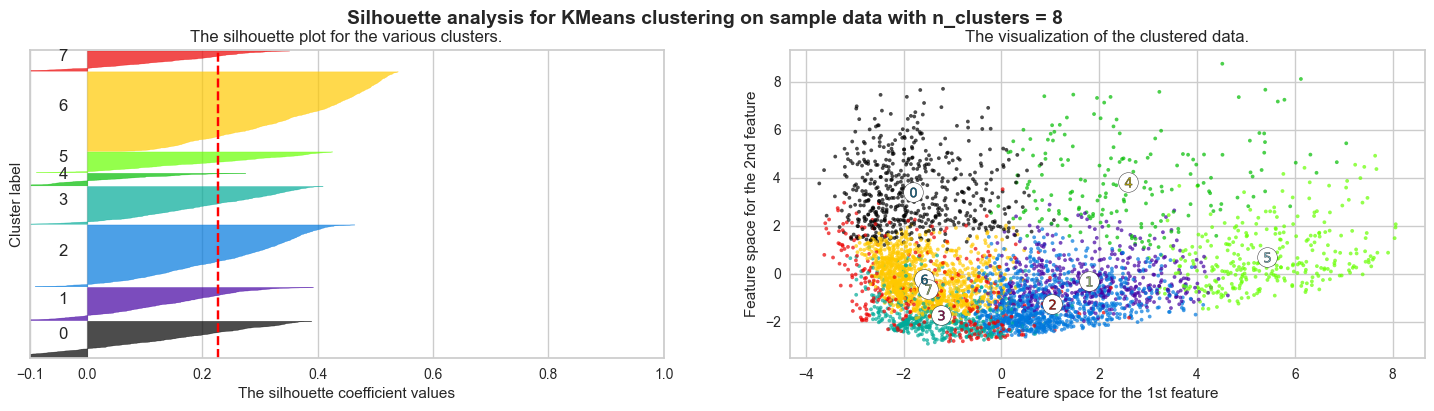

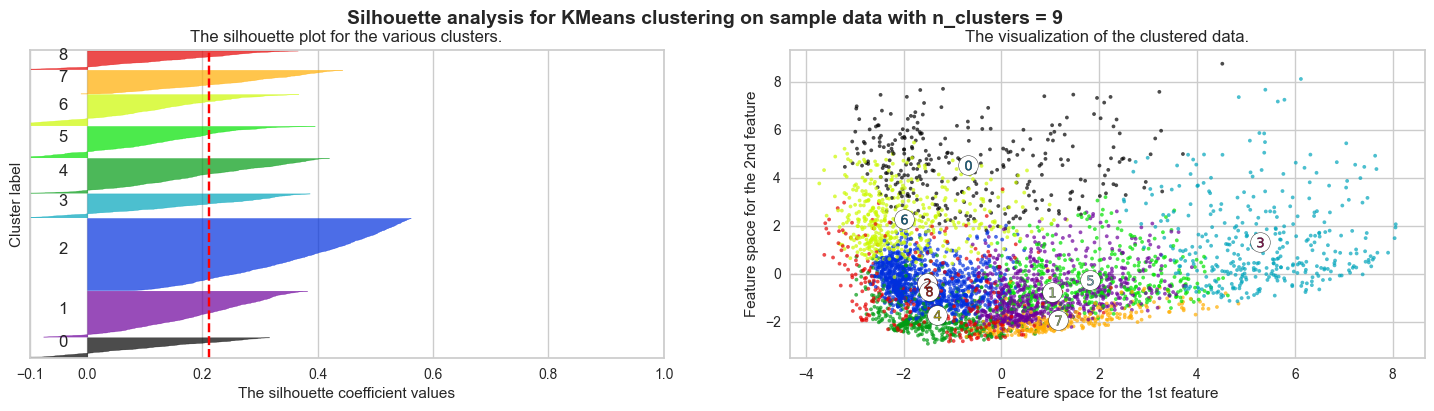

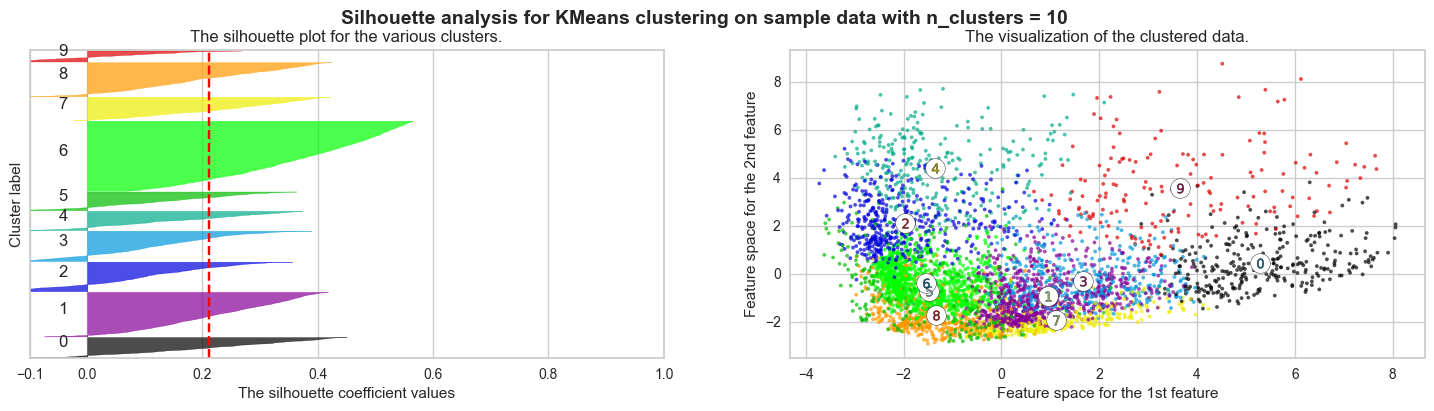

In [276]:
plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

> Temuan
- dari hasil silhouette_score yang paling mendekati 1 ialah n_cluster 2
- Ada ketidakseimbangan antar pengelompokan.
- silhouette_score n_cluster 4 lebih rendah dari n_cluster 2
- n_cluster 4 lebih seimbang antar pengelompokan. dibanding n_cluster 2
> **n_cluster 4** struktur data baik meskipun hasil lebih jelek dari pengelompokan lain (silhouette score lebih tinggi)

### Train with the Optimal Number of Clusters

In [277]:
# Kmeans
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

array([3, 3, 3, ..., 0, 0, 0])

In [278]:
df_backup_capped['cluster'] = pred
df_backup_capped


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,6.526735,0.181818,53.090,53.09,0.00,0.000000,0.083333,0.083333,0.0,0.0,0,1,1000.0,309.515966,86.885269,0.0,12,3
1,245.336939,0.363636,909.000,909.00,0.00,0.000000,0.083333,0.083333,0.0,0.0,0,1,3000.0,340.201751,55.410769,0.0,12,3
2,16.596410,0.545455,220.480,220.48,0.00,0.000000,0.083333,0.083333,0.0,0.0,0,1,5000.0,302.180025,60.558319,0.0,12,3
3,255.400100,0.454545,630.030,630.03,0.00,0.000000,0.083333,0.083333,0.0,0.0,0,1,3000.0,294.185139,294.438262,0.0,12,3
4,654.849672,1.0,630.000,630.00,0.00,0.000000,0.083333,0.083333,0.0,0.0,0,1,2500.0,729.355023,181.044246,0.0,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1780.188356,1.0,845.670,31.50,814.17,4137.170984,0.75,0.166667,0.583333,1.0,16,16,2500.0,3989.545295,566.947431,0.090909,12,0
4471,1868.576501,1.0,1337.340,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.0,10,23,3000.0,3236.129237,384.230828,0.0,6,0
4472,7836.467593,1.0,4370.365,2321.28,1195.81,4394.279848,1.0,0.571429,0.857143,1.0,16,15,13000.0,6413.216899,1287.324868,0.2,7,0
4473,5709.486507,0.833333,0.000,0.00,0.00,2794.326341,0.0,0.0,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6,0


In [279]:
df_backup_capped[df_backup_capped['cluster'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
194,7836.467593,1.0,989.320,989.32,0.00,0.000000,0.090909,0.090909,0.0,0.0,0,2,18000.0,6413.216899,2540.084696,0.0,11,0
261,7836.467593,1.0,226.230,226.23,0.00,0.000000,0.166667,0.166667,0.0,0.0,0,5,15000.0,1885.239981,2812.137310,0.0,12,0
522,7418.314012,1.0,901.620,858.82,42.80,0.000000,0.333333,0.166667,0.166667,0.0,0,4,14500.0,2273.945099,1696.786737,0.0,12,0
557,7836.467593,1.0,254.850,83.97,170.88,0.000000,0.333333,0.083333,0.25,0.0,0,5,12000.0,2105.588422,2812.137310,0.0,12,0
821,7836.467593,1.0,383.420,0.00,383.42,0.000000,0.5,0.0,0.416667,0.0,0,7,11000.0,1982.542865,1821.785907,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1780.188356,1.0,845.670,31.50,814.17,4137.170984,0.75,0.166667,0.583333,1.0,16,16,2500.0,3989.545295,566.947431,0.090909,12,0
4471,1868.576501,1.0,1337.340,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.0,10,23,3000.0,3236.129237,384.230828,0.0,6,0
4472,7836.467593,1.0,4370.365,2321.28,1195.81,4394.279848,1.0,0.571429,0.857143,1.0,16,15,13000.0,6413.216899,1287.324868,0.2,7,0
4473,5709.486507,0.833333,0.000,0.00,0.00,2794.326341,0.0,0.0,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6,0


In [280]:
df_backup_capped['cluster'].value_counts()

cluster
3    1820
1    1329
0     742
2     584
Name: count, dtype: int64

<Axes: >

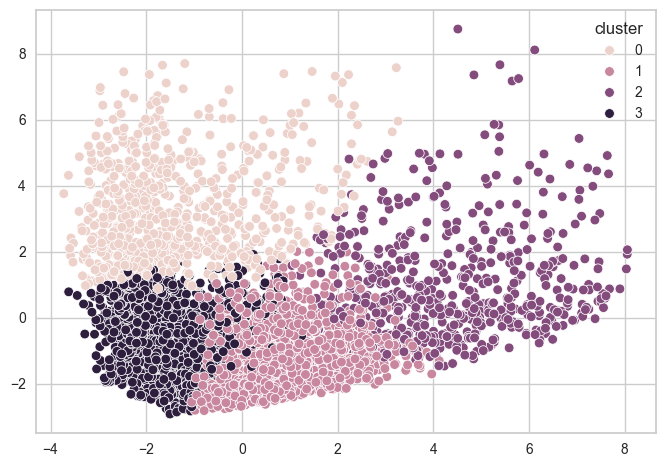

In [281]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_clean_scaled)

scaled_pca_2d = pca_2d.fit_transform(df_clean_scaled)

sns.scatterplot(x=scaled_pca_2d[:,0], y=scaled_pca_2d[:,1], hue=df_backup_capped['cluster'])

> Temuan
- Cluster 2 paling padat, mencerminkan pelanggan dengan aktivitas rendah dan pola yang seragam.
- Cluster 0 menyebar ke area atas, menunjukkan pelanggan dengan aktivitas menengah.
- Cluster 1 tersebar luas ke kanan, menggambarkan pelanggan yang lebih aktif.
- Cluster 3 berada di kanan atas dengan titik yang lebih terpencar, mengindikasikan pelanggan dengan aktivitas tertinggi atau perilaku ekstrem.


### EDA After Clustering

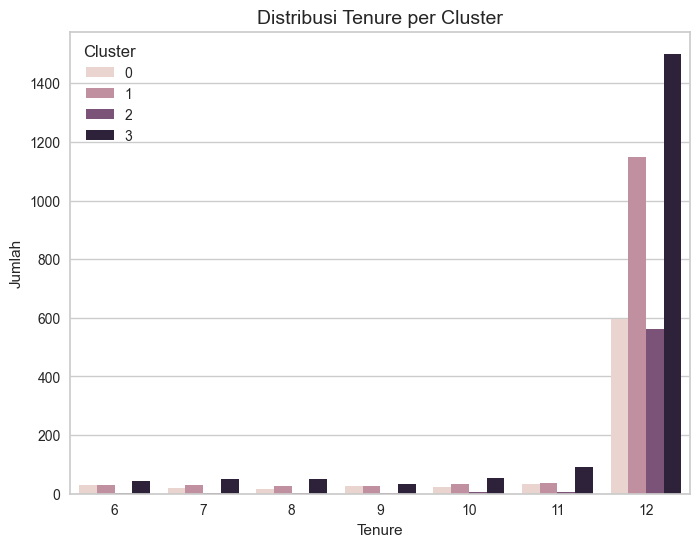

In [282]:
# Membuat bar plot
plt.figure(figsize=(8,6))
sns.countplot(data=df_backup_capped, x="TENURE", hue="cluster")
plt.title("Distribusi Tenure per Cluster", fontsize=14)
plt.xlabel("Tenure")
plt.ylabel("Jumlah")
plt.legend(title="Cluster")
plt.show()


> Distibusi Tenor berdasakan cluster
- mayoritas Cluster memiliki jangka waktu credit 12 bulan 
- cluster 3 pemuncak dari tenure 12 bulan


<Axes: xlabel='cluster', ylabel='CREDIT_LIMIT'>

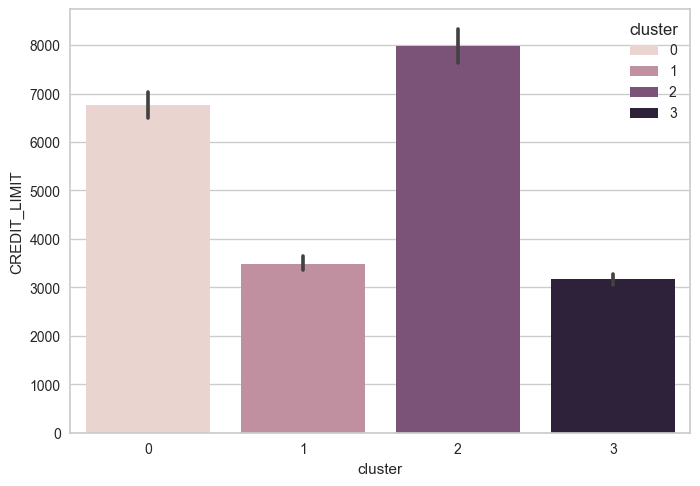

In [283]:
sns.barplot(x=df_backup_capped['cluster'], y=df_backup_capped['CREDIT_LIMIT'], hue=df_backup_capped['cluster'])

> Rata2 Credit limit berdasarkan cluster
- Cluster 2 memiliki rata-rata CREDIT_LIMIT (batas kredit) tertinggi, mencapai 8000.
- Cluster 0 memiliki rata-rata CREDIT_LIMIT tertinggi kedua, sekitar 6750.
- Cluster 1 memiliki rata-rata CREDIT_LIMIT terendah kedua, sekitar 3500.
- Cluster 3 memiliki rata-rata CREDIT_LIMIT terendah, sekitar 3200.

<Axes: xlabel='cluster', ylabel='PAYMENTS'>

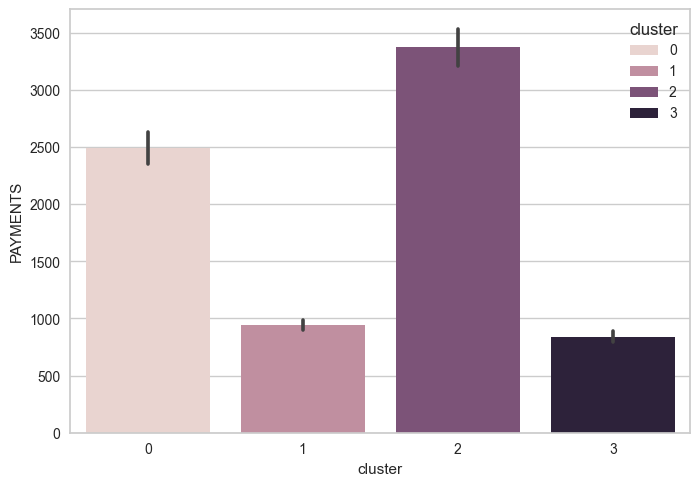

In [284]:
sns.barplot(x=df_backup_capped['cluster'], y=df_backup_capped['PAYMENTS'], hue=df_backup_capped['cluster'])

> Rata2 Pembayaran berdasarkan cluster
- Cluster 2 memiliki rata-rata PAYMENTS (pembayaran) tertinggi, mendekati 3500.
- Cluster 0 memiliki rata-rata PAYMENTS tertinggi kedua, sekitar 2500.
- Cluster 1 memiliki rata-rata PAYMENTS terendah kedua, sekitar 1000.
- Cluster 3 memiliki rata-rata PAYMENTS terendah, di bawah 1000.


<Axes: xlabel='cluster', ylabel='PURCHASES'>

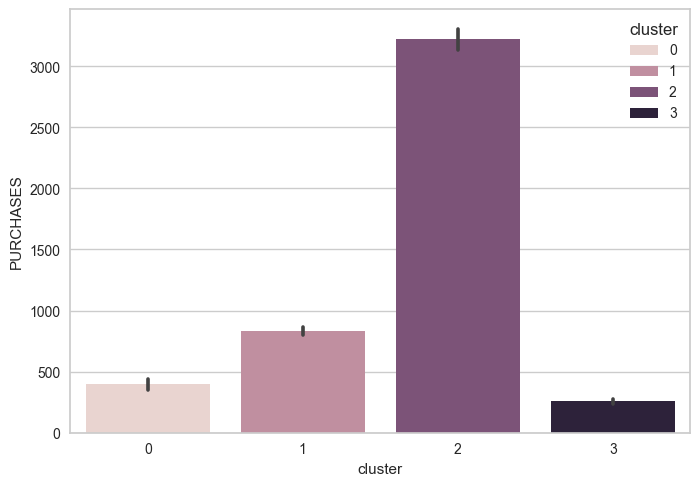

In [285]:
sns.barplot(x=df_backup_capped['cluster'], y=df_backup_capped['PURCHASES'], hue=df_backup_capped['cluster'])

> Rata2 Belaja berdasarkan cluster
- Cluster 2 memiliki rata-rata PURCHASES (pembelian) tertinggi secara signifikan, di atas 3000.
- Cluster 1 memiliki rata-rata PURCHASES tertinggi kedua, sekitar 850.
- Cluster 0 memiliki rata-rata PURCHASES terendah kedua, di bawah 500.
- Cluster 3 memiliki rata-rata PURCHASES terendah, sekitar 250.

Kesimpulan: Cluster 2 merupakan costumer paling aktif dalam belanja atau konsumtif

<Axes: xlabel='cluster', ylabel='BALANCE'>

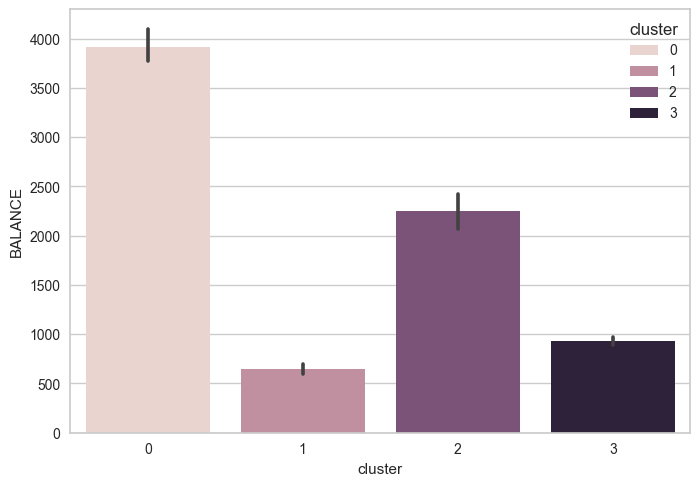

In [286]:
sns.barplot(x=df_backup_capped['cluster'], y=df_backup_capped['BALANCE'], hue=df_backup_capped['cluster'])

> Rata2 jumalah saldo tersisa berdasarkan cluster
- Cluster 0 memiliki rata-rata BALANCE (saldo) tertinggi, mendekati 4000.
- Cluster 2 memiliki rata-rata BALANCE tertinggi kedua, sekitar 2250.
- Cluster 3 memiliki rata-rata BALANCE terendah kedua, di bawah 1000.
- Cluster 1 memiliki rata-rata BALANCE terendah, di bawah 750.

Kesimpulan: Cluster 0 cenderung menyimpan saldo lebih besar. dan penuh pertimbangan dalam pembelanjaan

#### Kesimpulan After Clustering

| **Kluster** | **Karakteristik Utama**                           | **Profil Pelanggan**                                                                                      | **Rekomendasi Bisnis**                                                                              |
| ----------- | ------------------------------------------------- | --------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **0**       | Balance tinggi, limit tinggi, purchases rendah    | **Pengguna Saldo Besar** — saldo dan limit tinggi, jarang bertransaksi, tetapi rutin melakukan pembayaran | Sediakan program pengurangan saldo dan insentif agar lebih sering bertransaksi (reward/poin ekstra) |
| **1**       | Balance rendah, limit rendah, purchases sedang    | **Pembeli Moderat** — menggunakan kartu secara hati-hati dengan pembelian stabil                          | Tawarkan peningkatan limit bertahap untuk mendorong transaksi lebih besar                           |
| **2**       | Purchases, limit, dan payments sangat tinggi      | **Pengguna Aktif Premium** — pelanggan paling aktif dan paling menguntungkan                              | Prioritaskan loyalitas dengan penawaran premium dan program reward eksklusif                        |
| **3**       | Balance, limit, payments, purchases sangat rendah | **Pengguna Minimalis** — menggunakan kartu sangat sedikit                                                 | Berikan insentif awal (diskon/bonus) untuk meningkatkan aktivitas penggunaan kartu                  |


### Saving

In [287]:

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_pca.pkl', 'wb') as file_4:
  pickle.dump(Pca, file_4)

with open('model_kmean.pkl', 'wb') as file_5:
  pickle.dump(km, file_5)

### Kesimpulan

> Project ini akan dibuat menggunakan reduction dimensi PCA  dengan mempertahankan 95% fitur Algoritma Kmeans dan akan dievaluasi dengan Elbow method dan silhouette_score.
- define numerik 
- handlin outlier
- hanling missng value
- PCA 95% didapat dari Eigenvalues dan Variance Ratio dengan jumlah 11 fitur
- menggunakan Kmeans
- elvaluasi dengan elbow method dan silhouette_score



> Kesimpulan Inference

Pelanggan dengan CUST_ID 9999 selaras dengan karakter Cluster 1 – “Pembeli Moderat”.
Mereka memiliki pola penggunaan yang stabil: pembelian moderat, batas kredit wajar, dan saldo terkontrol.
Dengan TENURE 12, pelanggan ini menunjukkan loyalitas dan konsistensi tanpa perilaku transaksi yang ekstrem.

Kesimpulannya, model clustering berhasil mengelompokkan pelanggan ini secara akurat sesuai perilaku penggunaan kartunya.